**Dataset: Electric_Production Analysis**

**Seasonal Decomposition from Scratch**

**Step one: Simulating time series components**

In [ ]:
# get libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = df['IPG2211A2N']
df.head()

0    72.5052
1    70.6720
2    62.4502
3    57.4714
4    55.3151
Name: IPG2211A2N, dtype: float64

In [ ]:
T_series = df

Let us create the trend component of our time series.

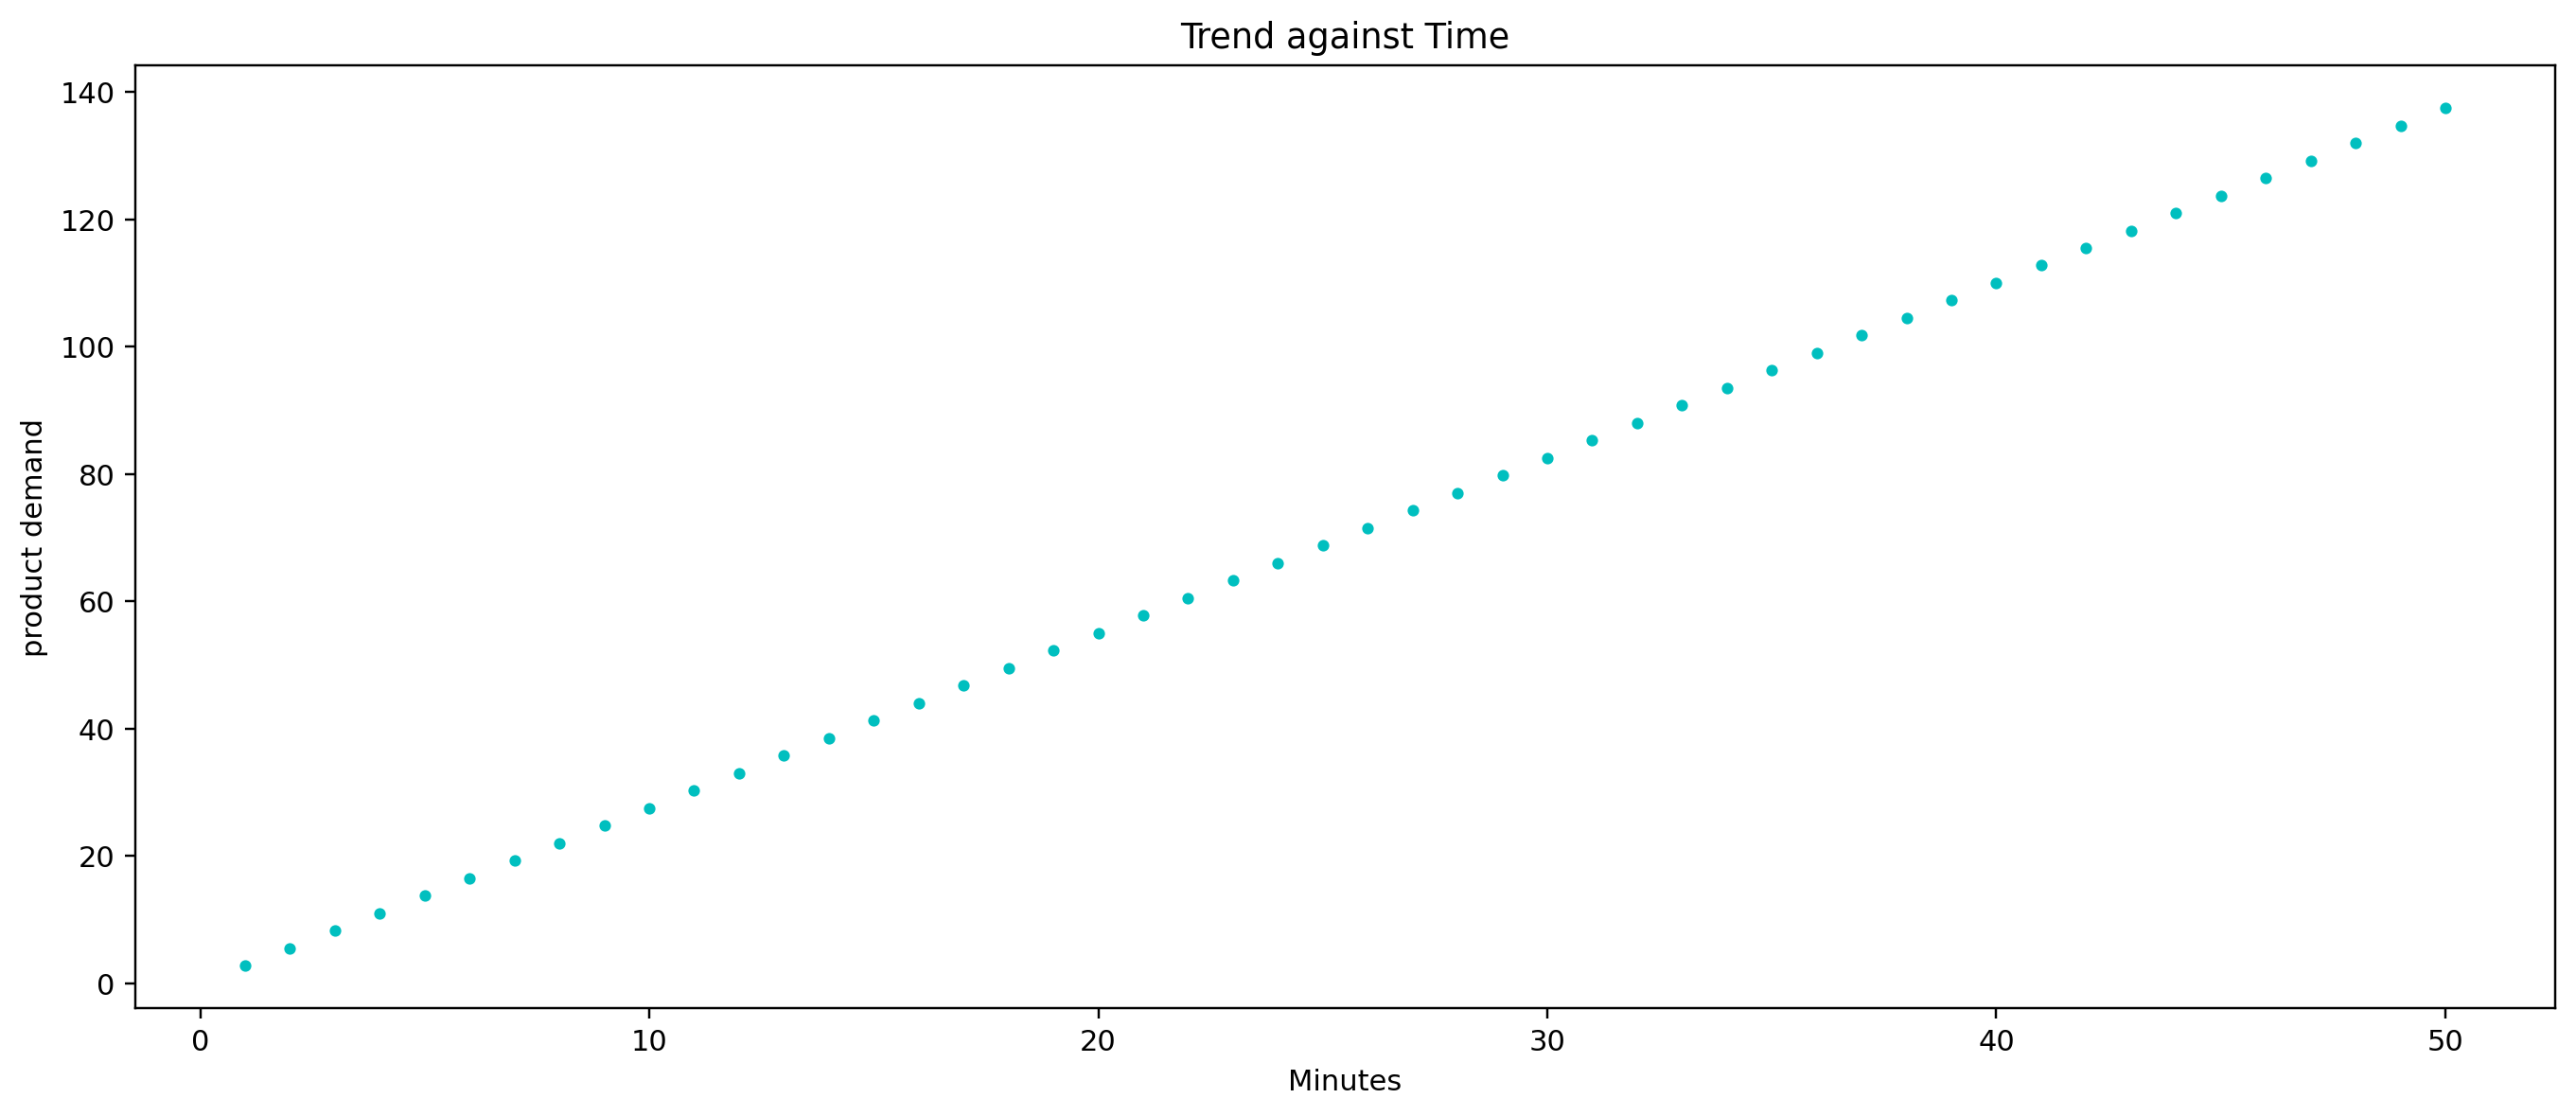

In [ ]:
#Simulating time series components

# stting the range of time series
T_Series = np.arange(1, 51)

#create the trend component
Trend = T_Series * 2.75

#plot the trend
plt.plot(T_Series, Trend, 'c.')
plt.title("Trend against Time")
plt.xlabel("Minutes")
plt.ylabel("product demand");

Now that we have the trend component let us simulate our seasonality component. To do this, we shall adopt the sin function as it is the function that can yield those seasonal fluctuations of time series in the best way.

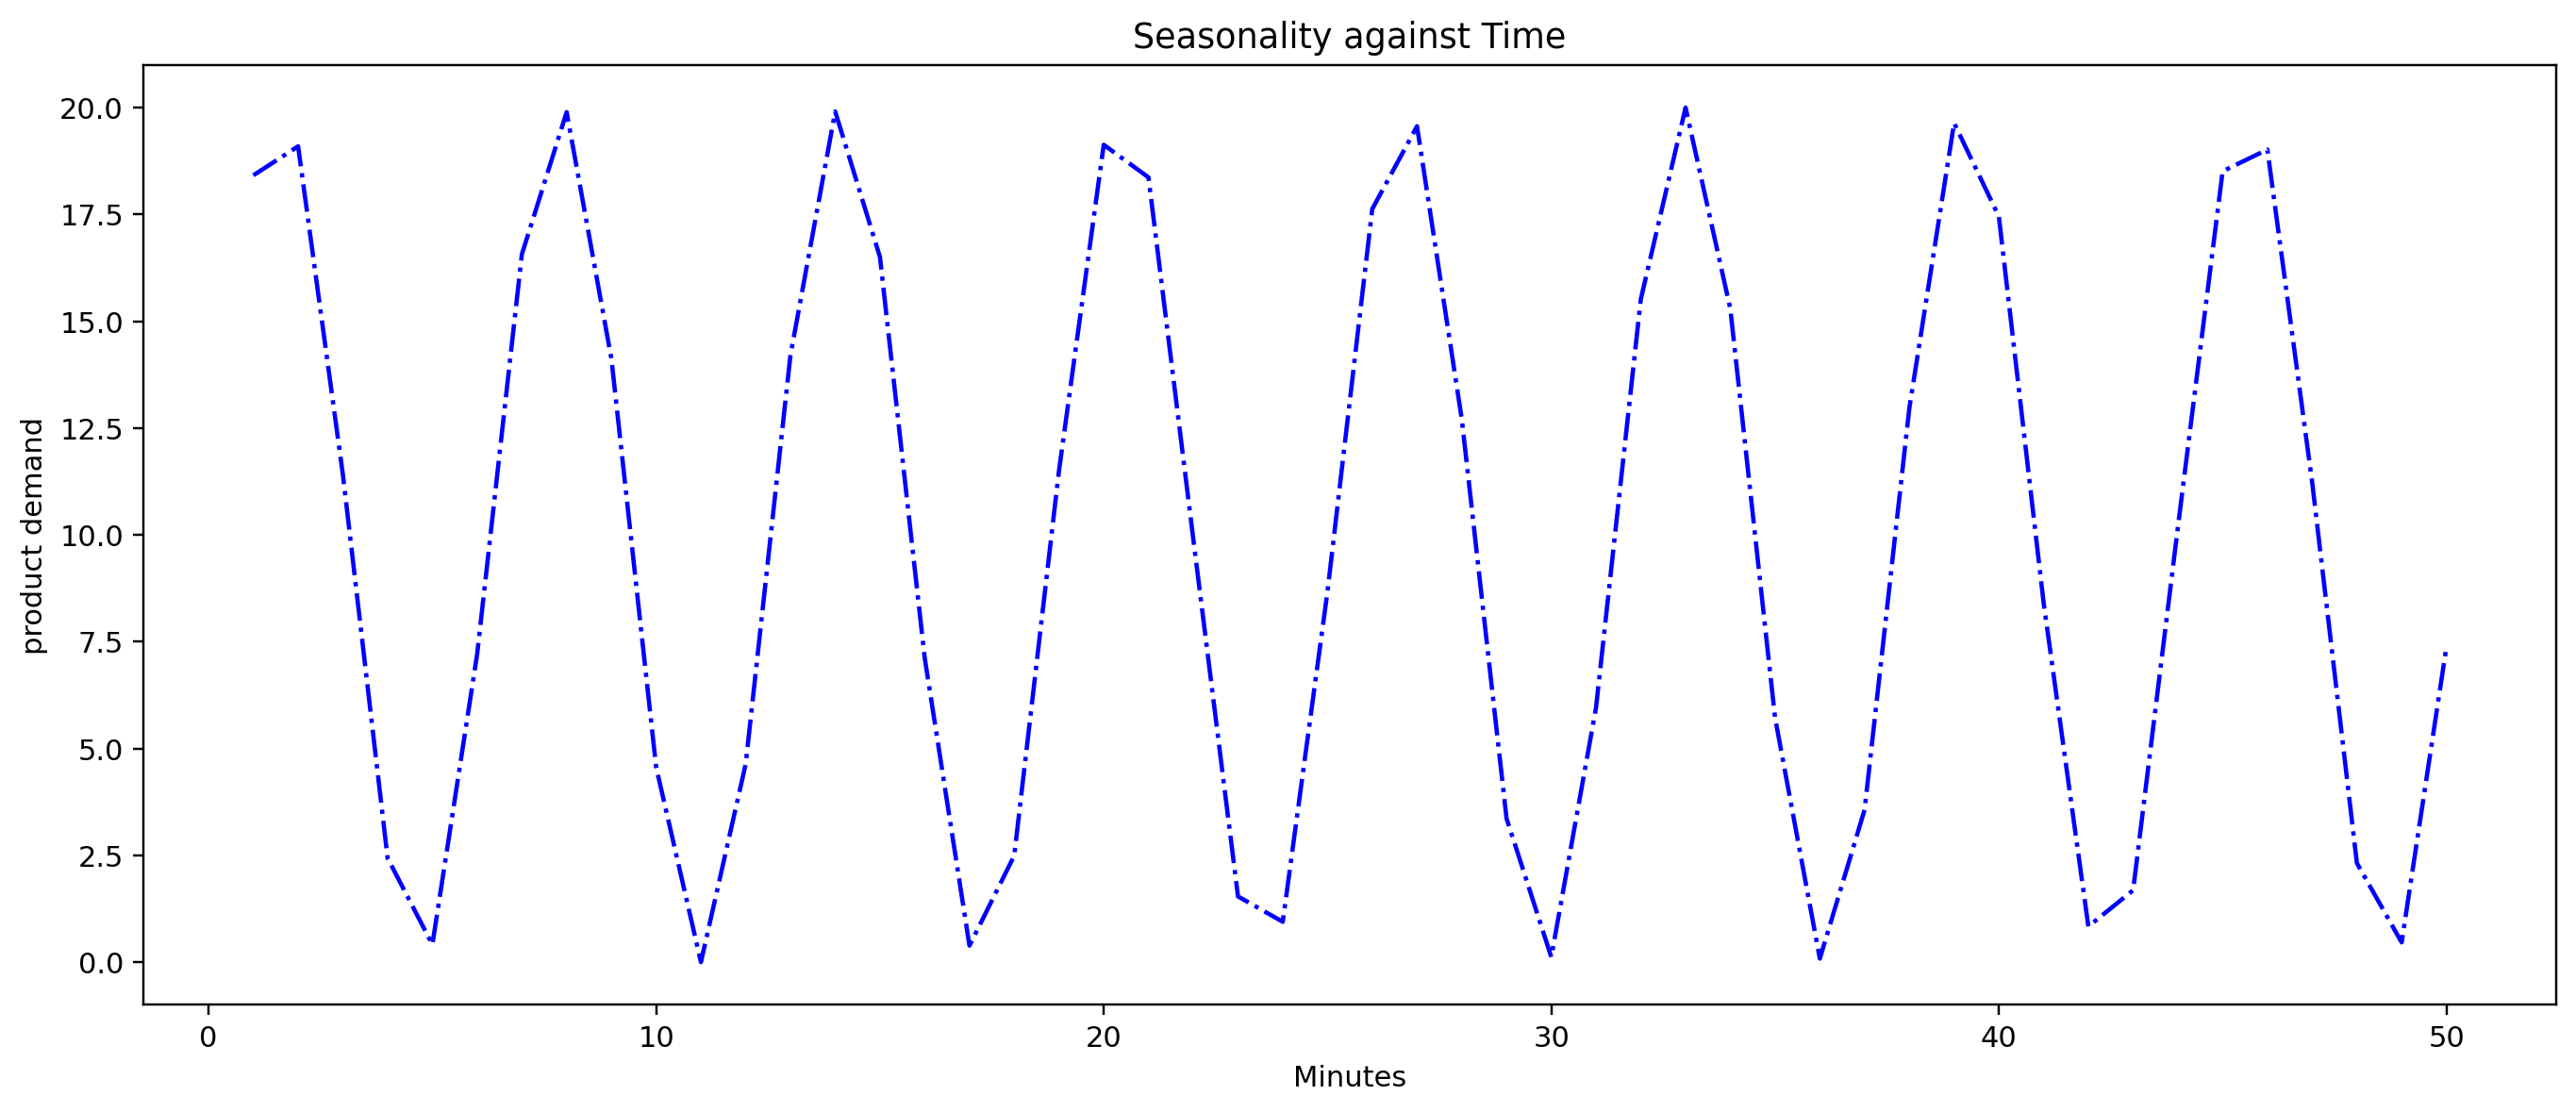

In [ ]:
# creating the seasonality component
seasonality = 10 + np.sin(T_Series) * 10

#plot the seasonality trend
plt.plot(T_Series,  seasonality, 'b-.')
plt.title("Seasonality against Time")
plt.xlabel("Minutes")
plt.ylabel("product demand");

The remaining component to create is the residual component. Let’s simulate it using the NumPY random function.

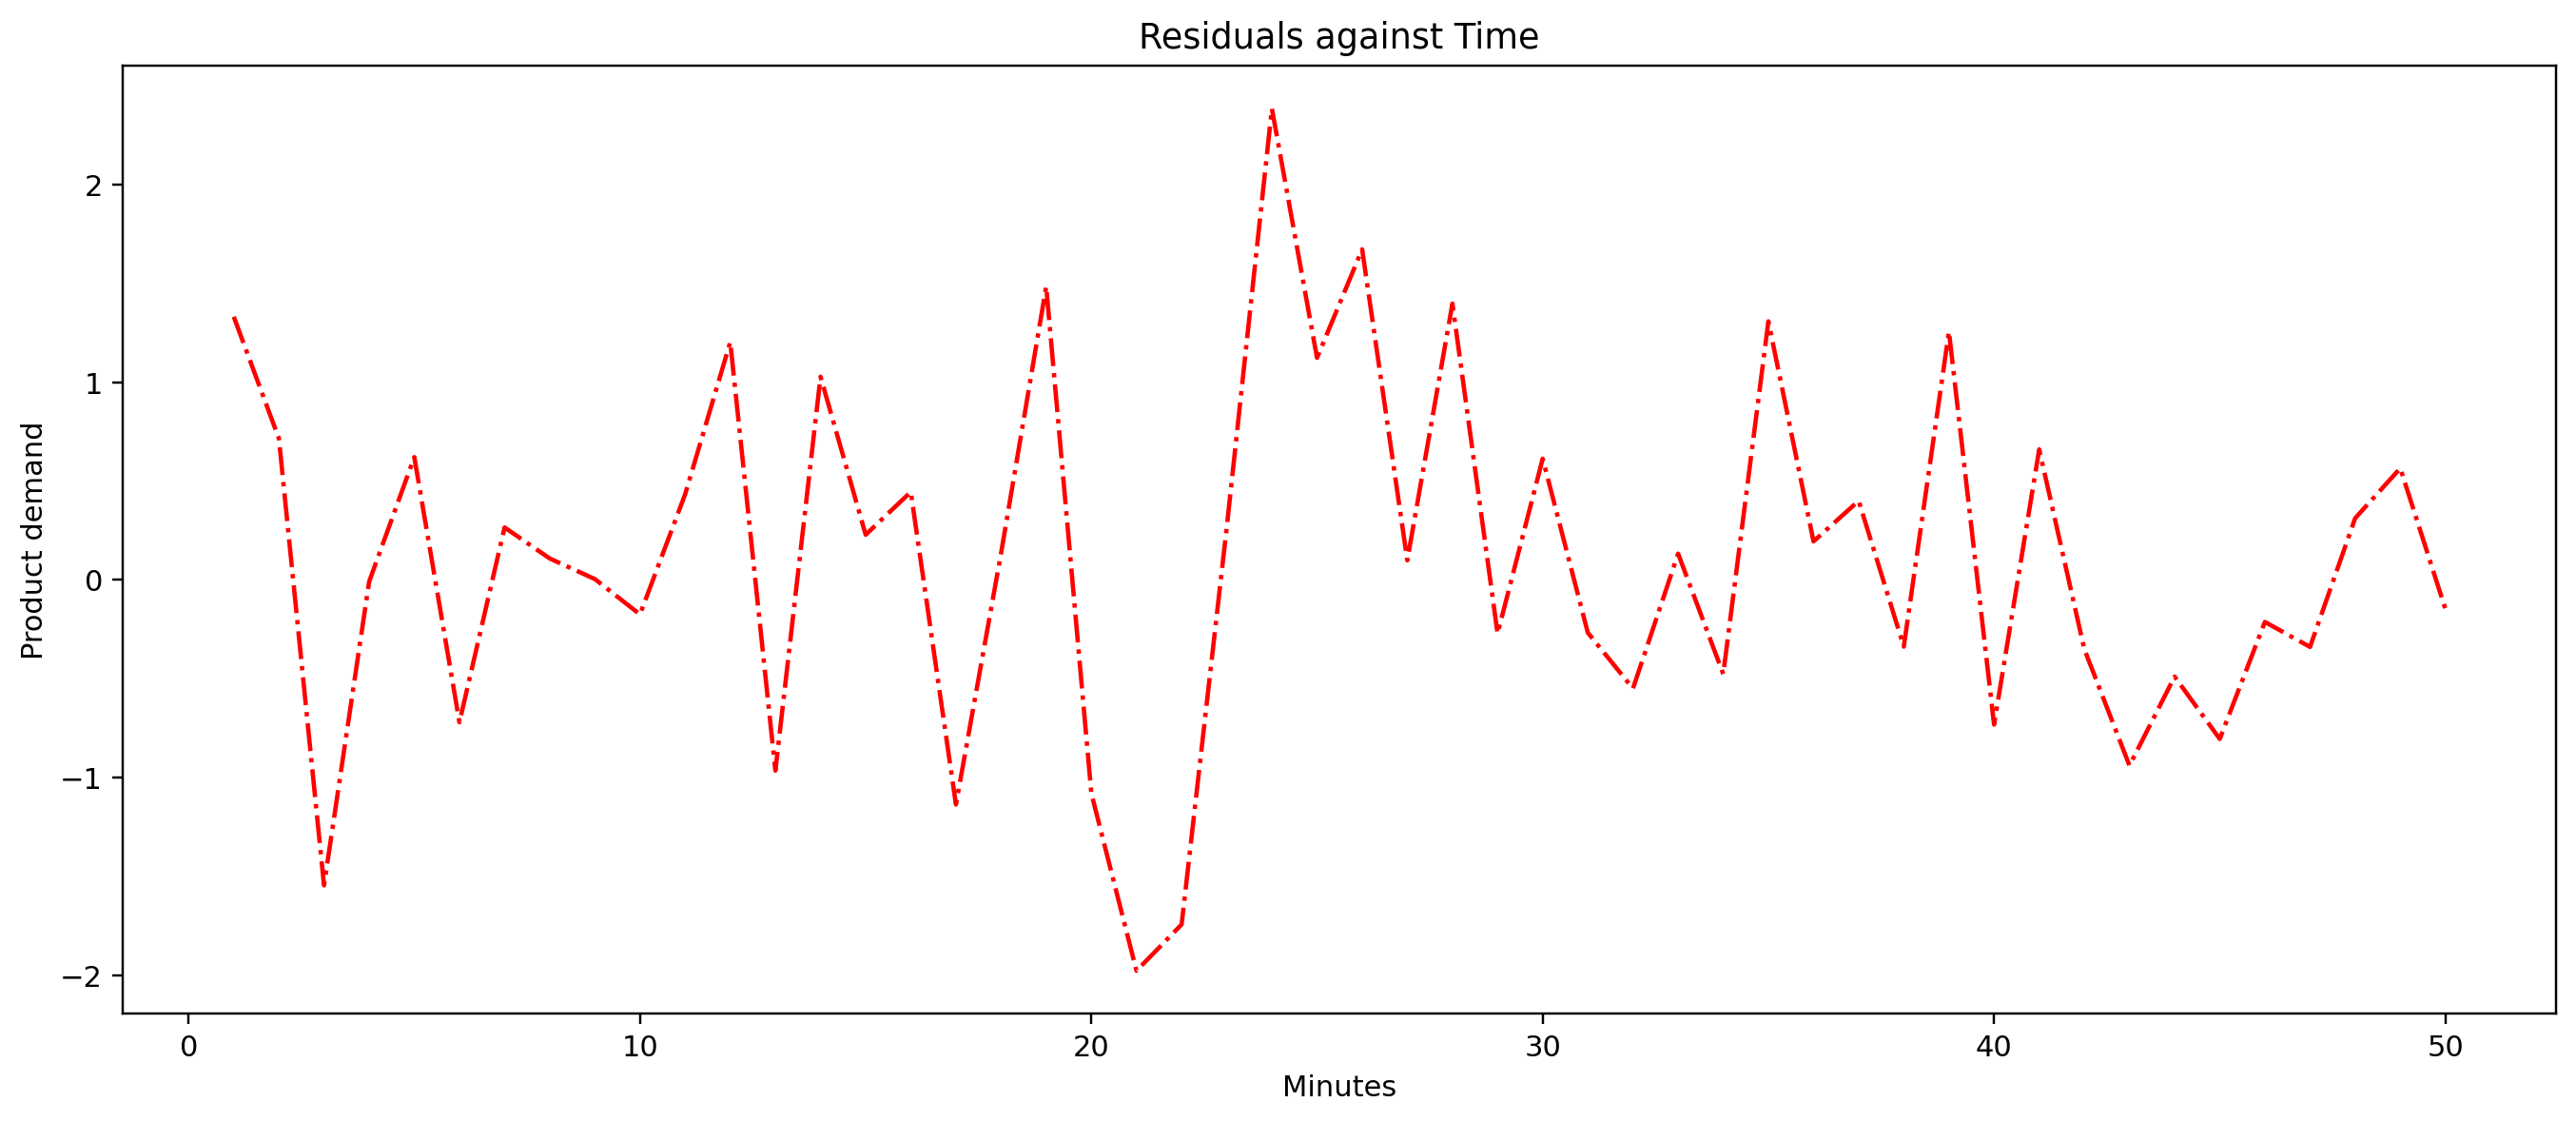

In [ ]:
#creating the residual component
np.random.seed(10)  # for result reproducibility
residual = np.random.normal(loc=0.0, scale=1, size=len(T_Series))

#plot the residual component 
plt.plot(T_Series, residual, 'r-.')
plt.title("Residuals against Time")
plt.xlabel("Minutes")
plt.ylabel("Product demand");

We have all the time series components now, and therefore, we can create the time series value at any particular point in time.

The first thing we shall do with these components is to create an additive model of our time series. 

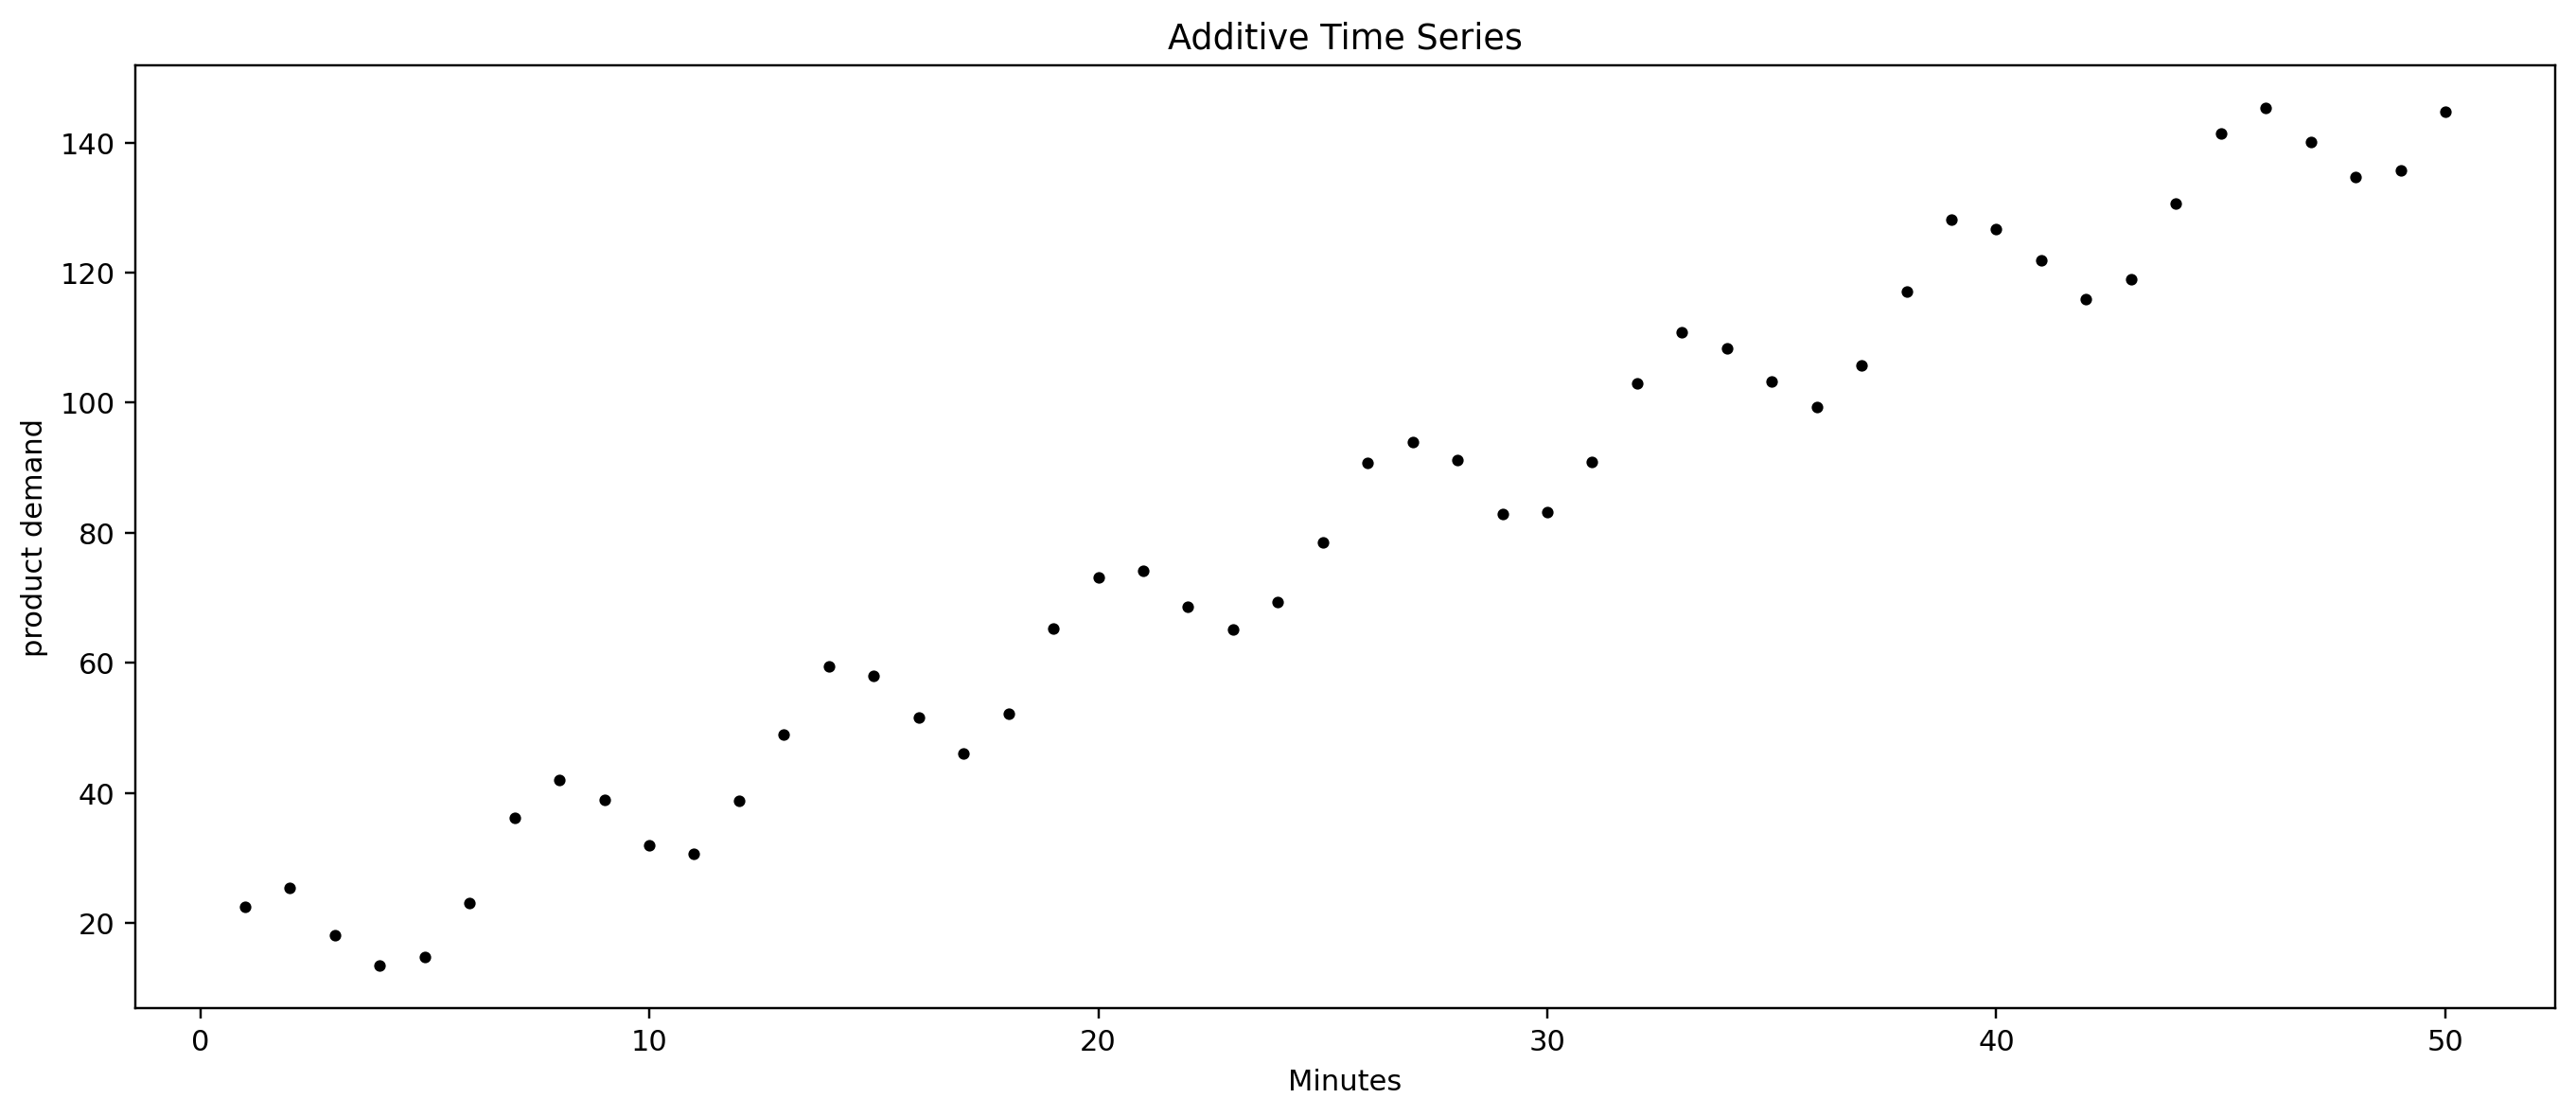

In [ ]:
#create an additive model of our time series
additive_Tmodel = Trend + seasonality + residual

#Plot the additive model
plt.plot(T_Series, additive_Tmodel, 'k.')
plt.title("Additive Time Series")
plt.xlabel("Minutes")
plt.ylabel("product demand");

It is straightforward to note that the seasonality component of the additive time series model above does not change with the change in trend, which is an essential feature for a time series to be considered an additive time series.

Similarly, let us create a multiplicative time series. To make the pattern more apparent, in this case, we will ignore the residuals in the model. We then create our model as follows:

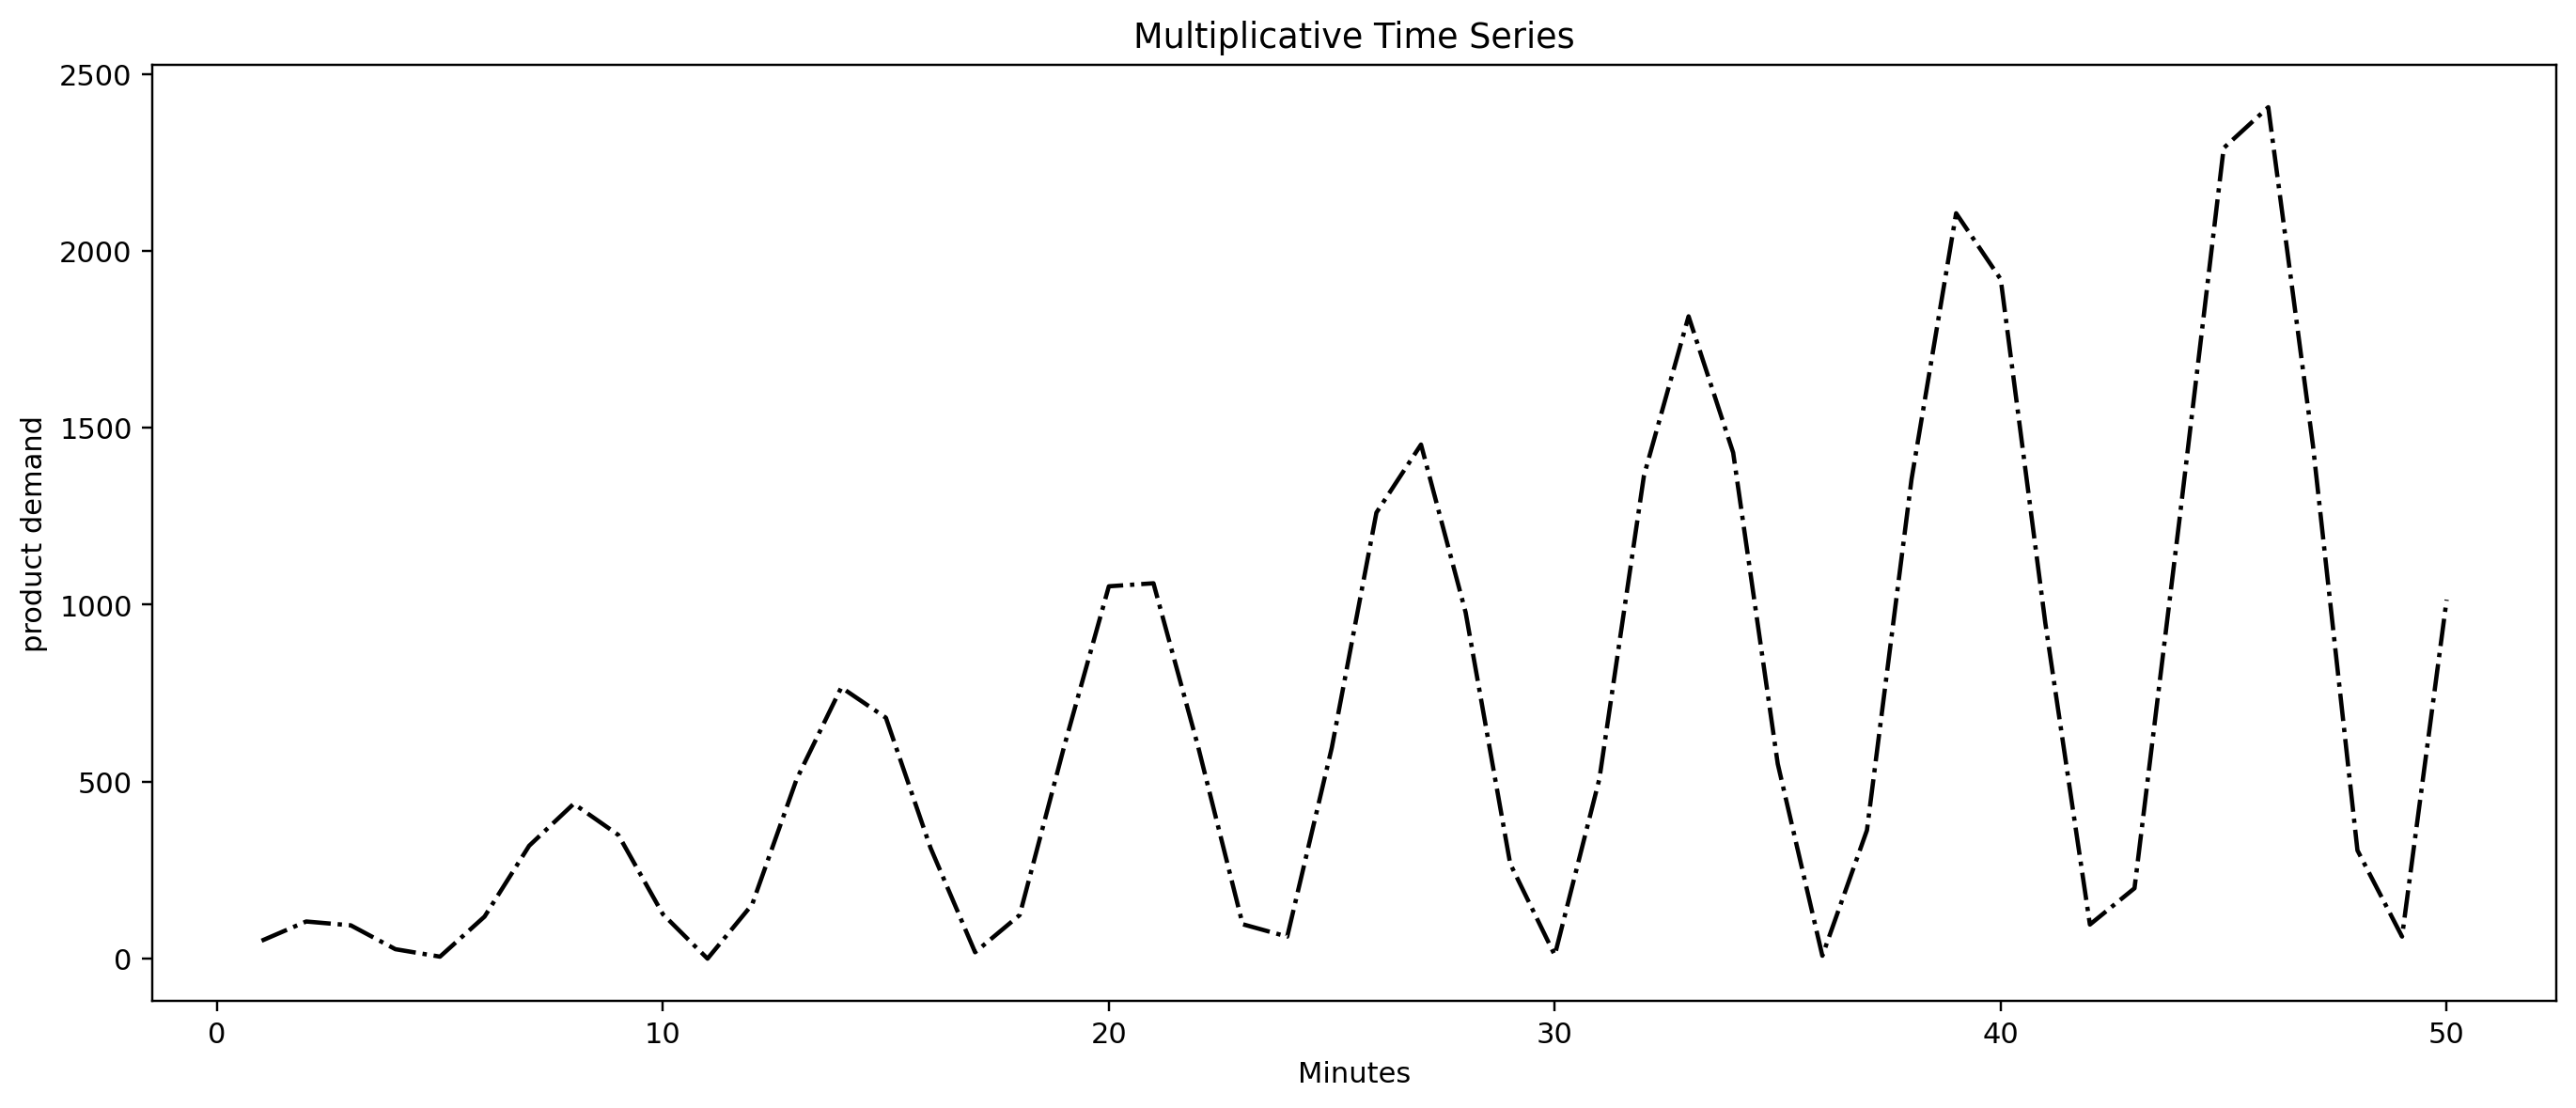

In [ ]:
#create a multiplicative time series
# we ignore residual to make the pattern more apparent
ignored_residual = np.ones_like(residual)
# we multiply other components to create a multiplicative time series
multiplicative_Tmodel = Trend * seasonality * ignored_residual

#Plot the multiplicative model
plt.plot(T_Series, multiplicative_Tmodel, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("Minutes")
plt.ylabel("product demand");

**Step two: Time series decomposition**

Additive time series decomposition

<ipython-input-47-dae26abd1e36>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  ts_dicomposition = seasonal_decompose(x=additive_Tmodel, model='additive', freq=6)


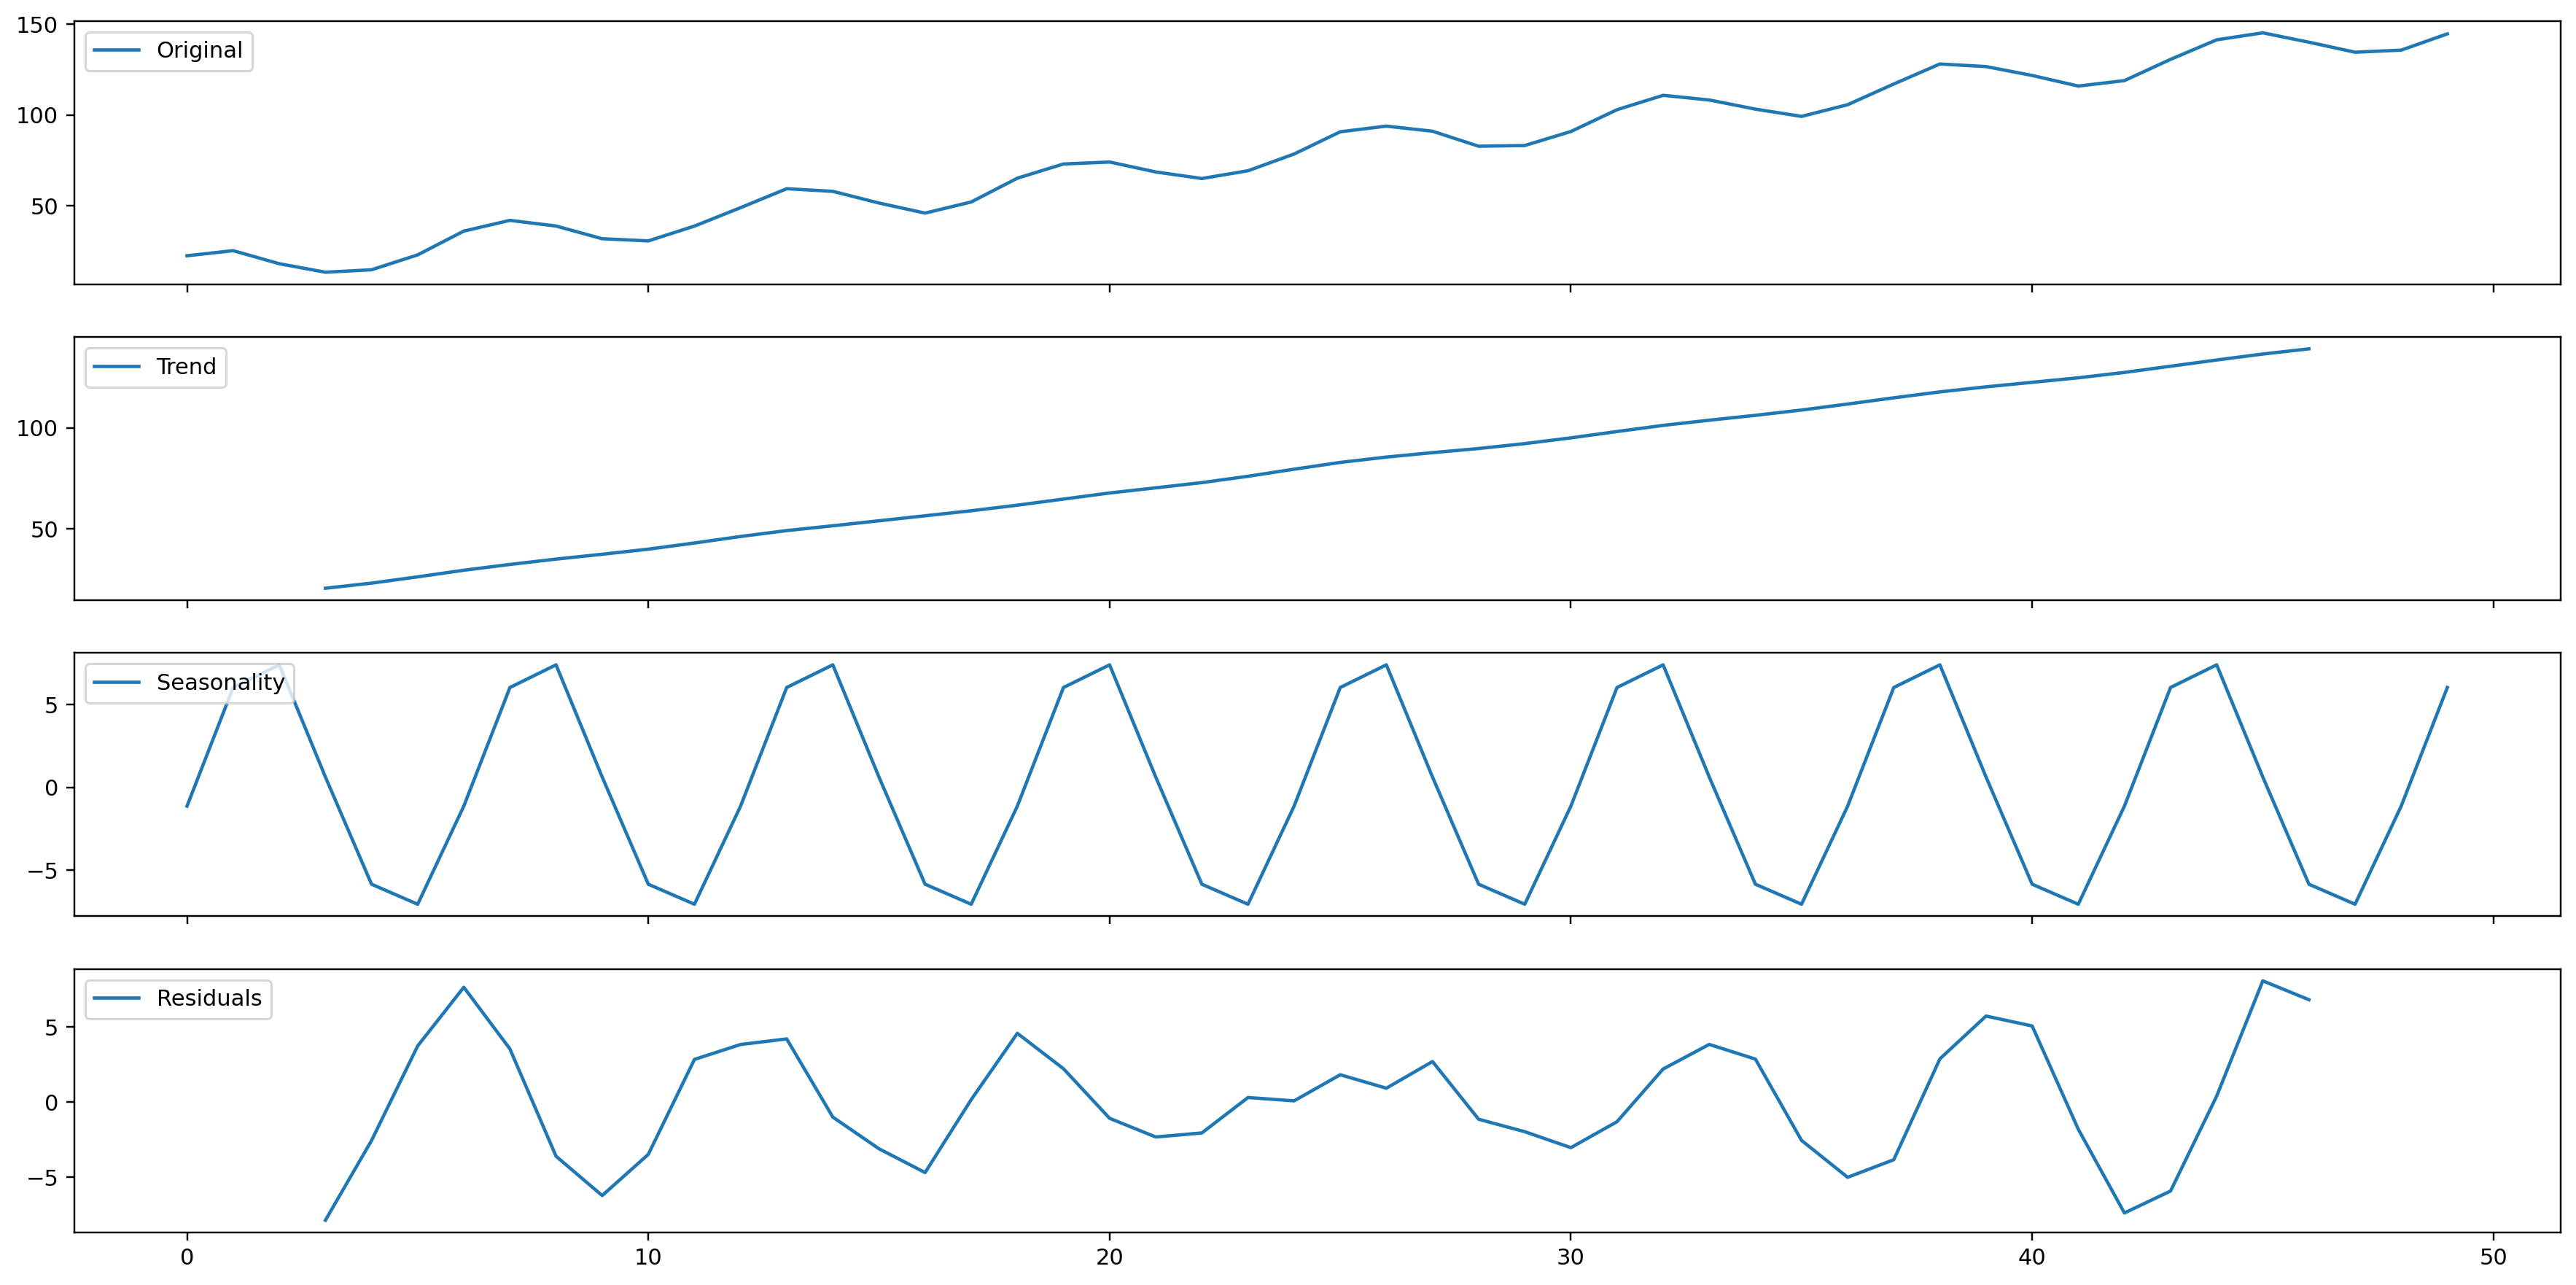

In [ ]:
#Additive time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# frequency is the time a time serie is taking to complete on cycal
ts_dicomposition = seasonal_decompose(x=additive_Tmodel, model='additive', freq=6)
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

# Plotting the time series and it's components together
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(20)
# First plot to the Original time series
axes[0].plot(additive_Tmodel, label='Original') 
axes[0].legend(loc='upper left');
# second plot to be for trend
axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');
# third plot to be Seasonality component
axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');
# last last plot to be Residual component
axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

The first plot represents our original time series. The second plot represents the trend of our time series model extracted from the original time series. Finally, the third and fourth plots represent seasonality and residual components in the same time series.

**Decomposing multiplicative time series model**

We shall follow similar steps as the ones we used to decompose the Additive time series except that we specify the model as the multiplicative time series.

<ipython-input-48-e9624fbdb345>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  ts_decomposition = seasonal_decompose(x=multiplicative_Tmodel, model='multiplicative', freq=6)


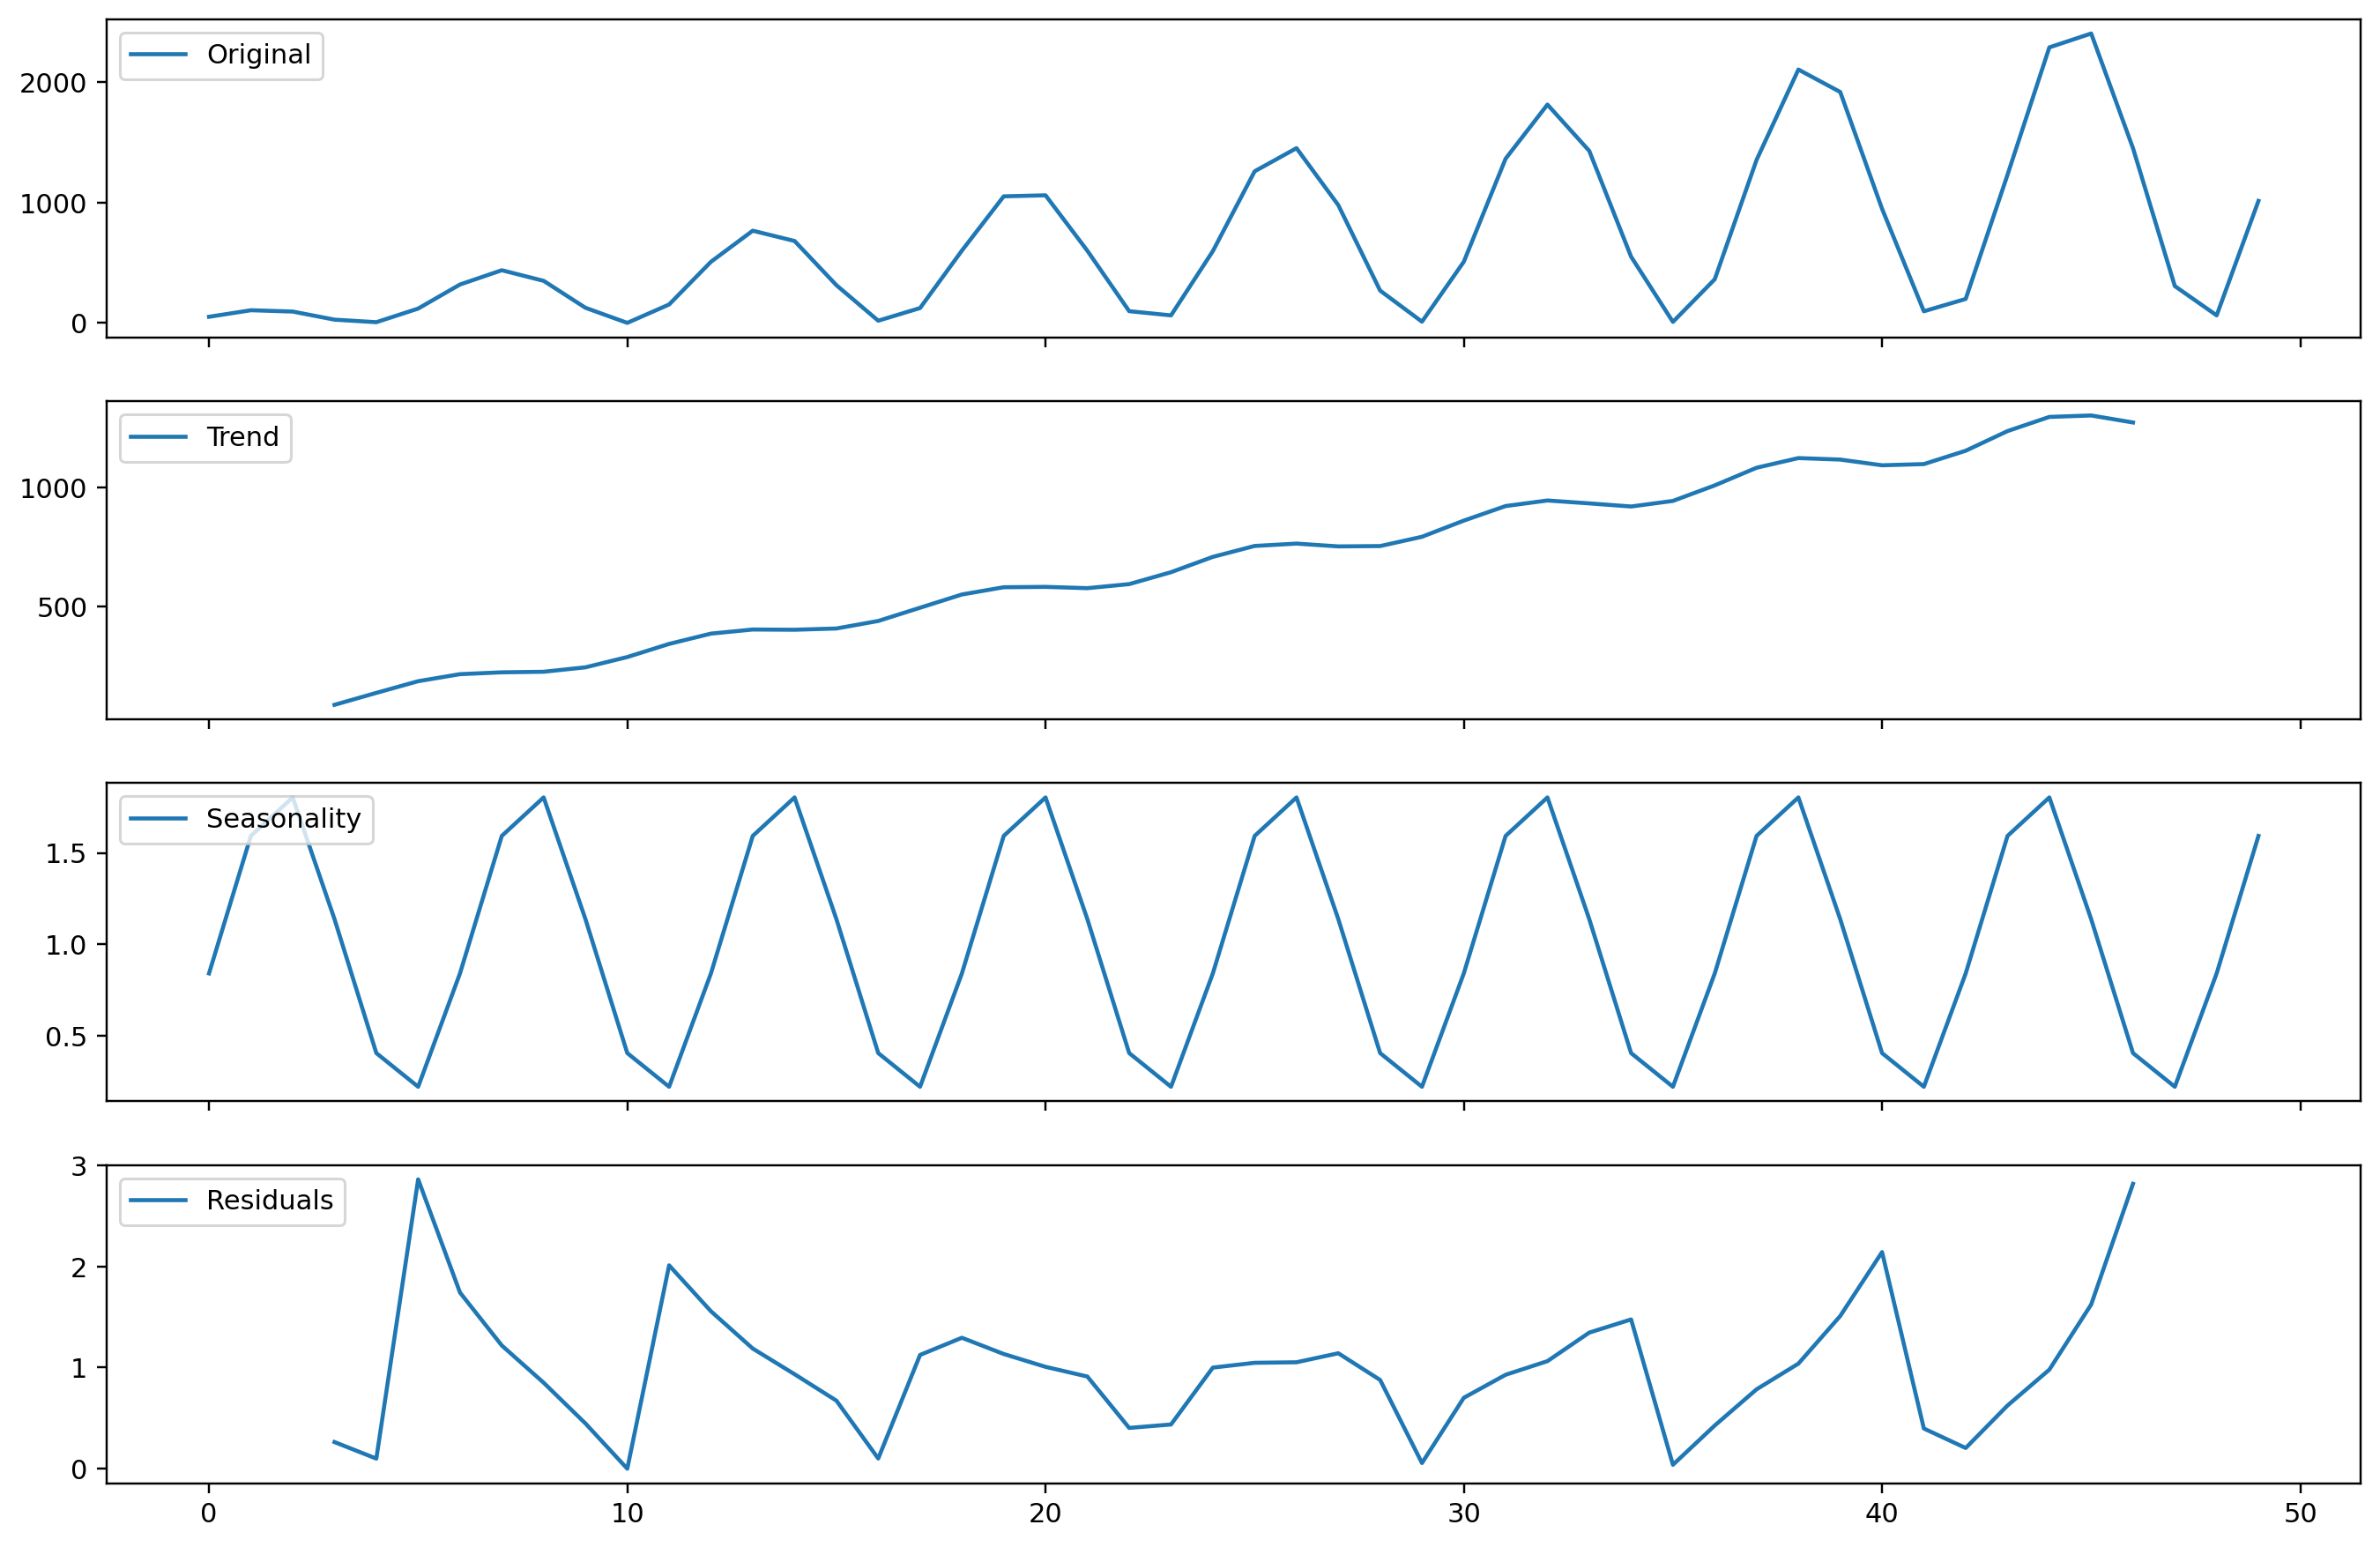

In [ ]:
#Decomposing multiplicative time series model
ts_decomposition = seasonal_decompose(x=multiplicative_Tmodel, model='multiplicative', freq=6)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(multiplicative_Tmodel, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');



So, to learn the correlation in real-world data, we shall be required to decompose the data first to eliminate the deterministic causes of variation in the data. 

**Data decomposition using Library**

In [ ]:
df = pd.read_csv(r'/content/Electric_Production.csv',parse_dates=True)

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'],format = "%Y/%m/%d")
df.head()

,DATE,IPG2211A2N,month,year
0,1985-01-01,72.5052,Jan,1985
1,1985-01-02,70.6720,Jan,1985
2,1985-01-03,62.4502,Jan,1985
3,1985-01-04,57.4714,Jan,1985
4,1985-01-05,55.3151,Jan,1985


**Multiple BoxPlot**

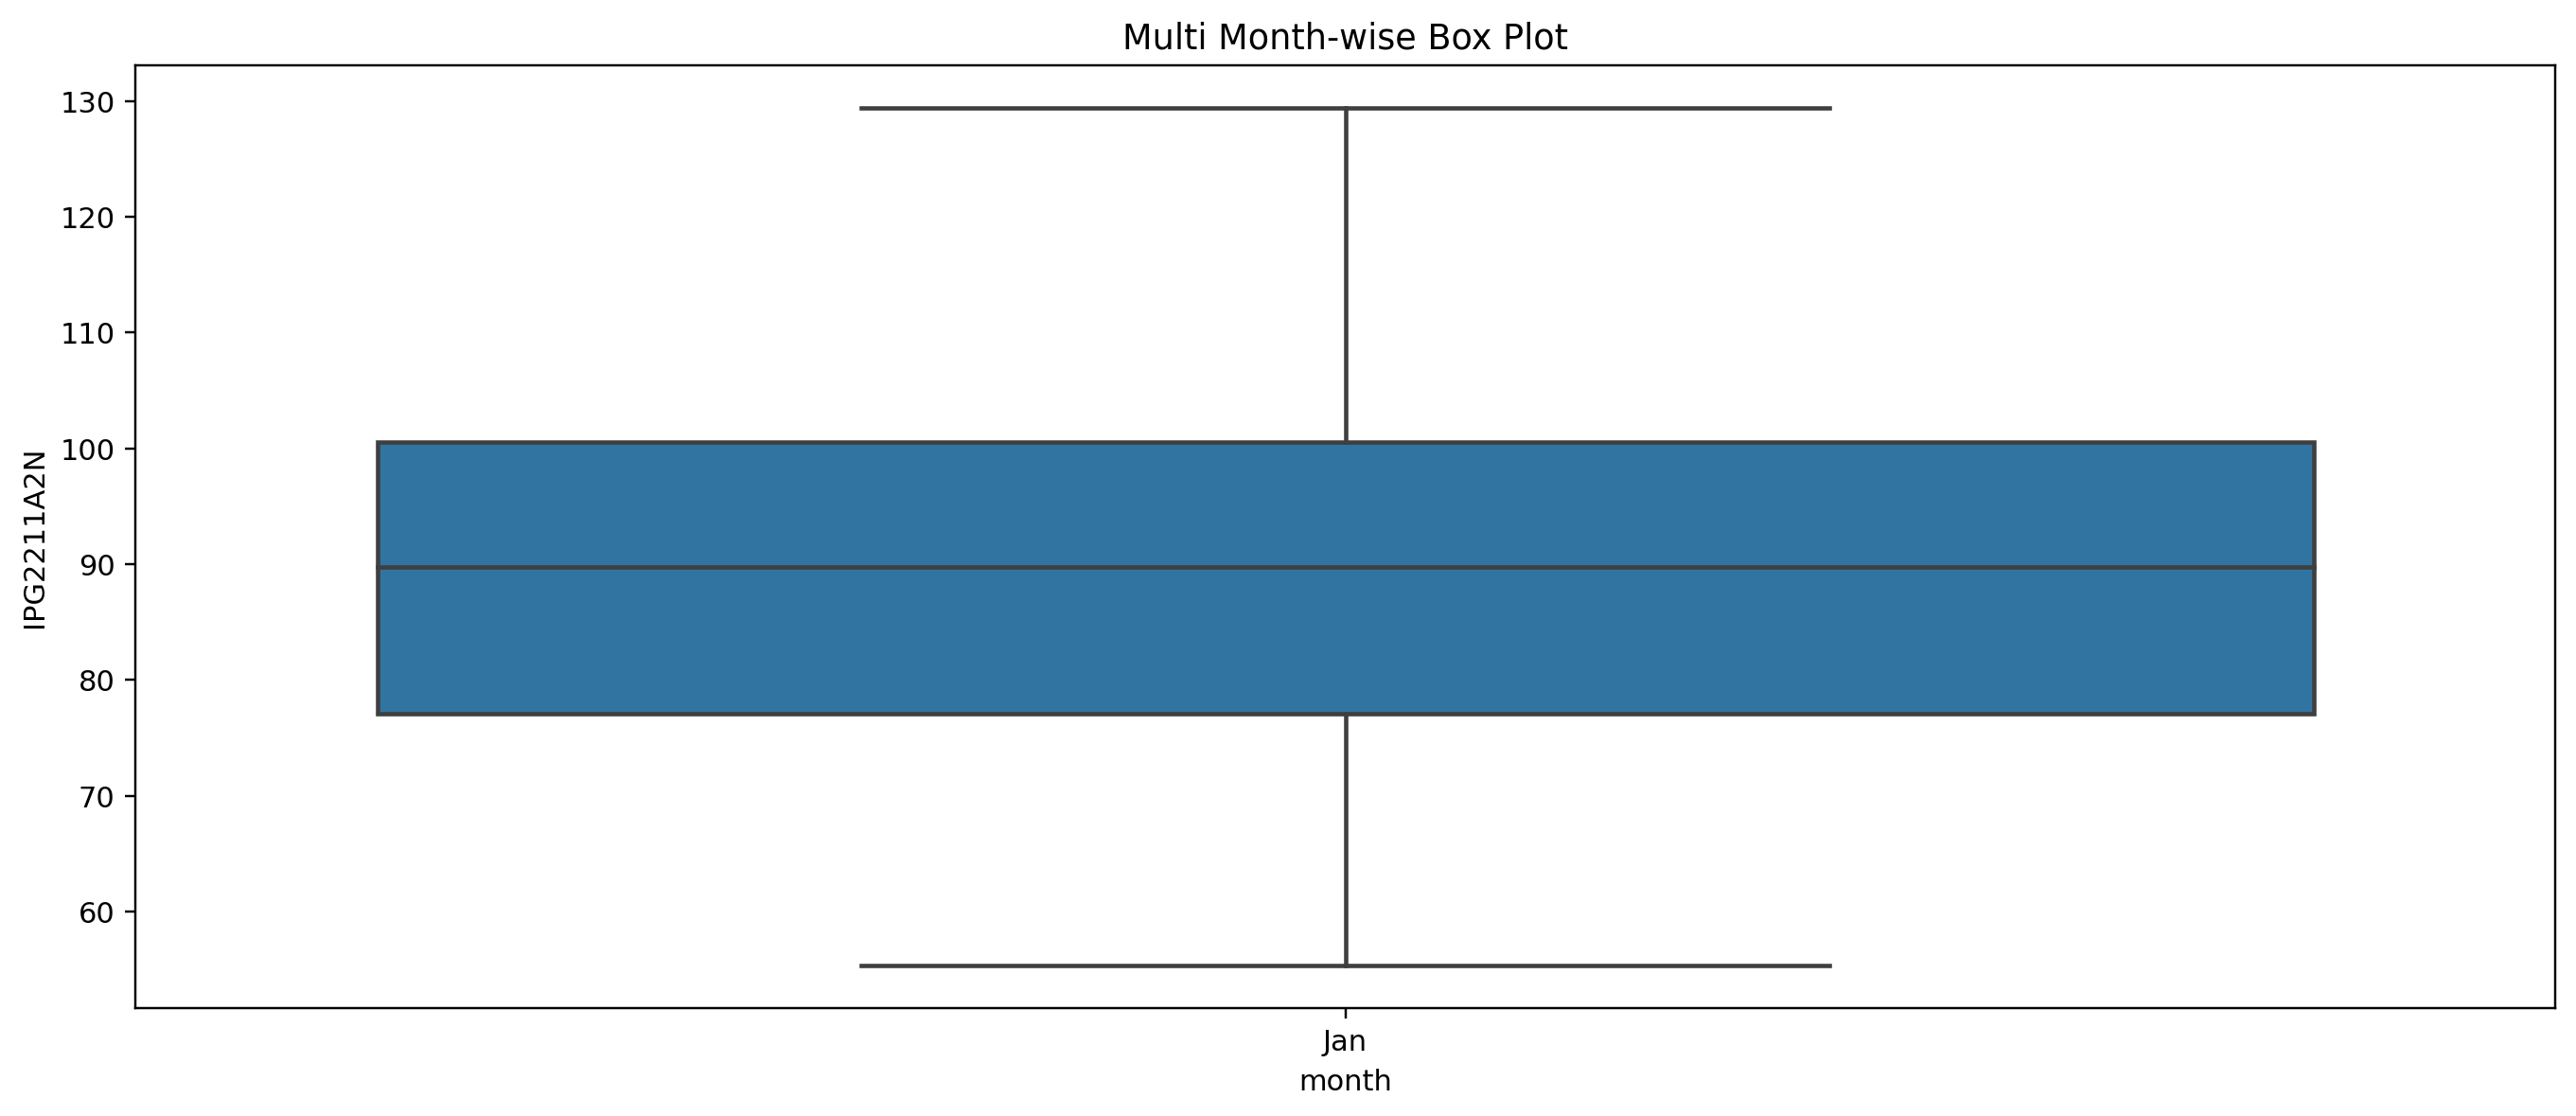

In [ ]:
df['month'] = df['DATE'].dt.strftime('%b')
df['year'] = [d.year for d in df['DATE']]
df['month'] = [d.strftime('%b') for d in df['DATE']]
years = df['year'].unique()
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='IPG2211A2N', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

**Seasonality using Autocorrelation Plot**

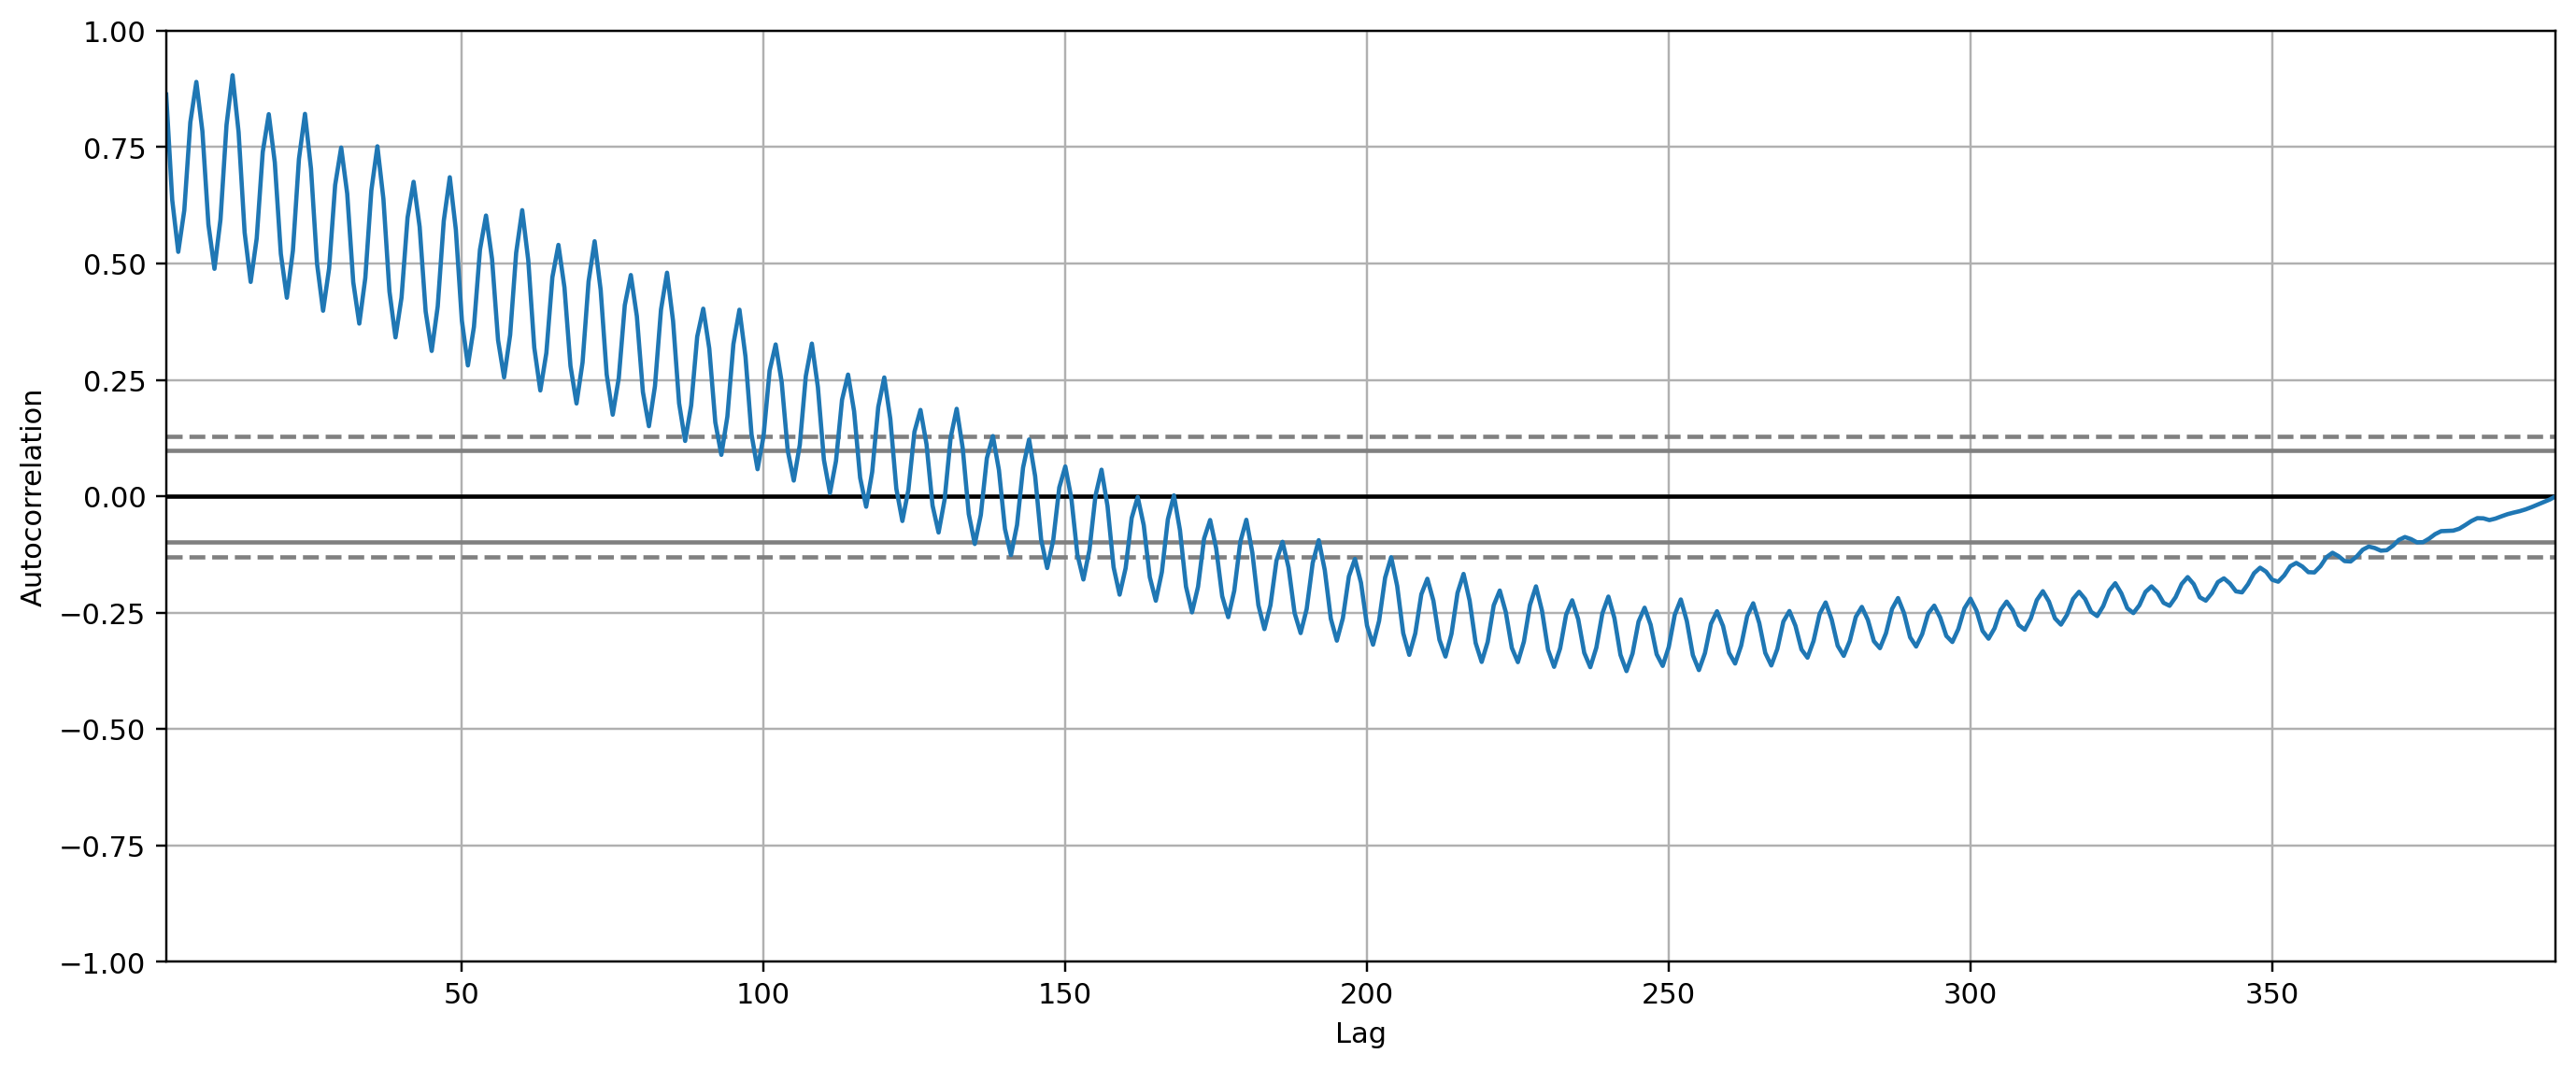

In [ ]:
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':220})
autocorrelation_plot(df.IPG2211A2N.tolist())

**Deseasoning Time series**

<ipython-input-38-7f03591b7d12>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_mul = seasonal_decompose(df['IPG2211A2N'], model='multiplicative',freq = 6)


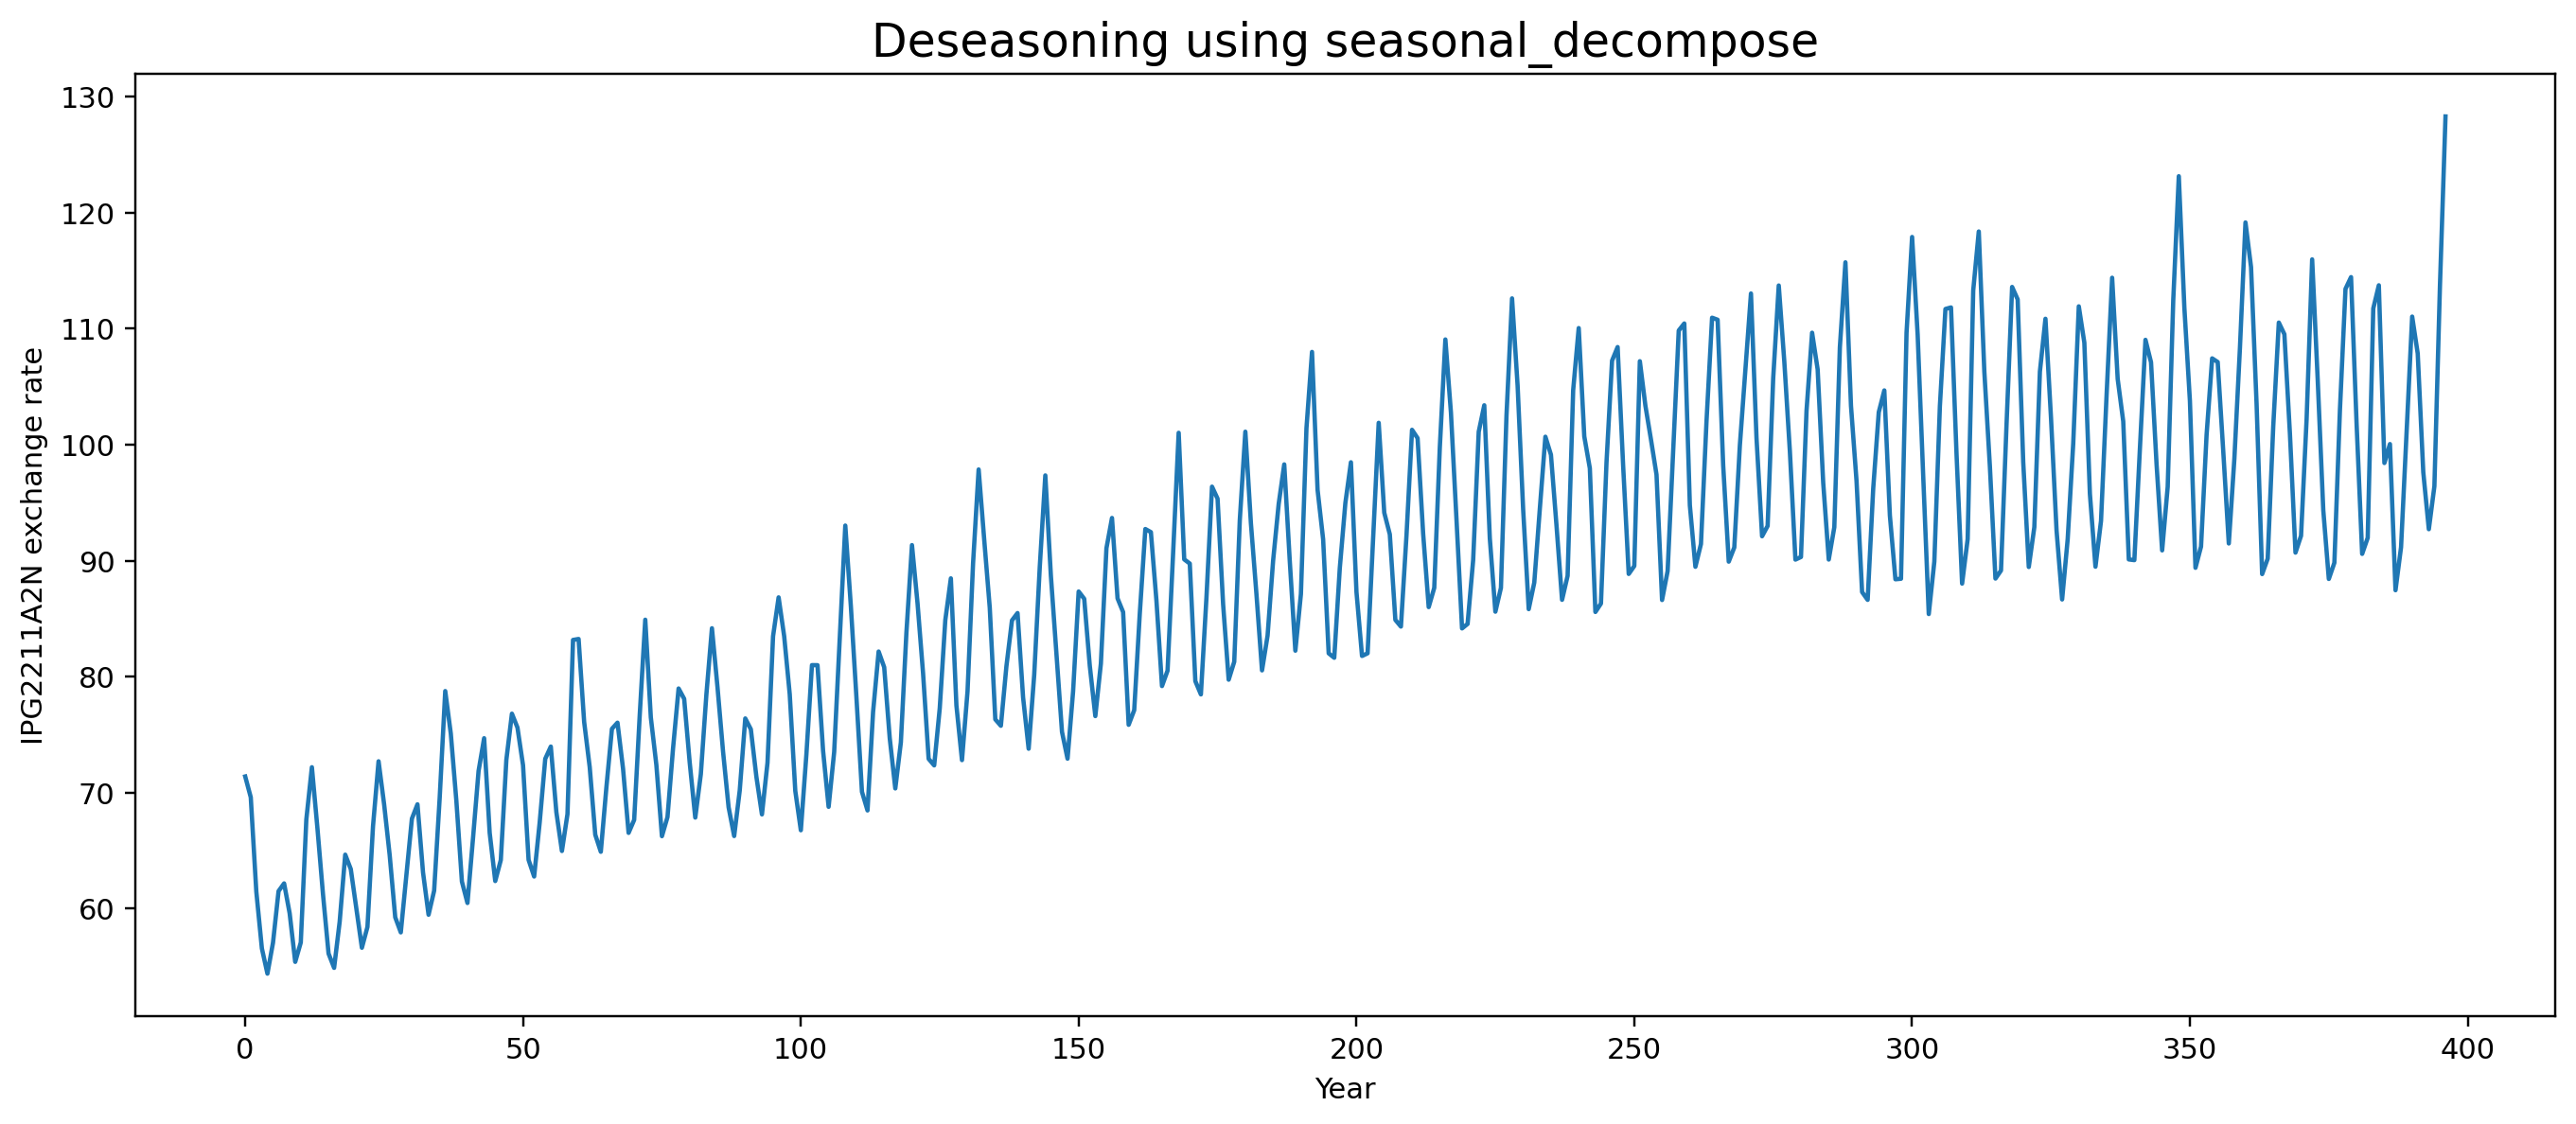

In [ ]:
result_mul = seasonal_decompose(df['IPG2211A2N'], model='multiplicative',freq = 6)
deseason = df['IPG2211A2N'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('IPG2211A2N exchange rate')
plt.show()

# Seasonal Decomposition using Library

<ipython-input-39-0a3d501dc541>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df['IPG2211A2N'], model='mul',freq = 6)


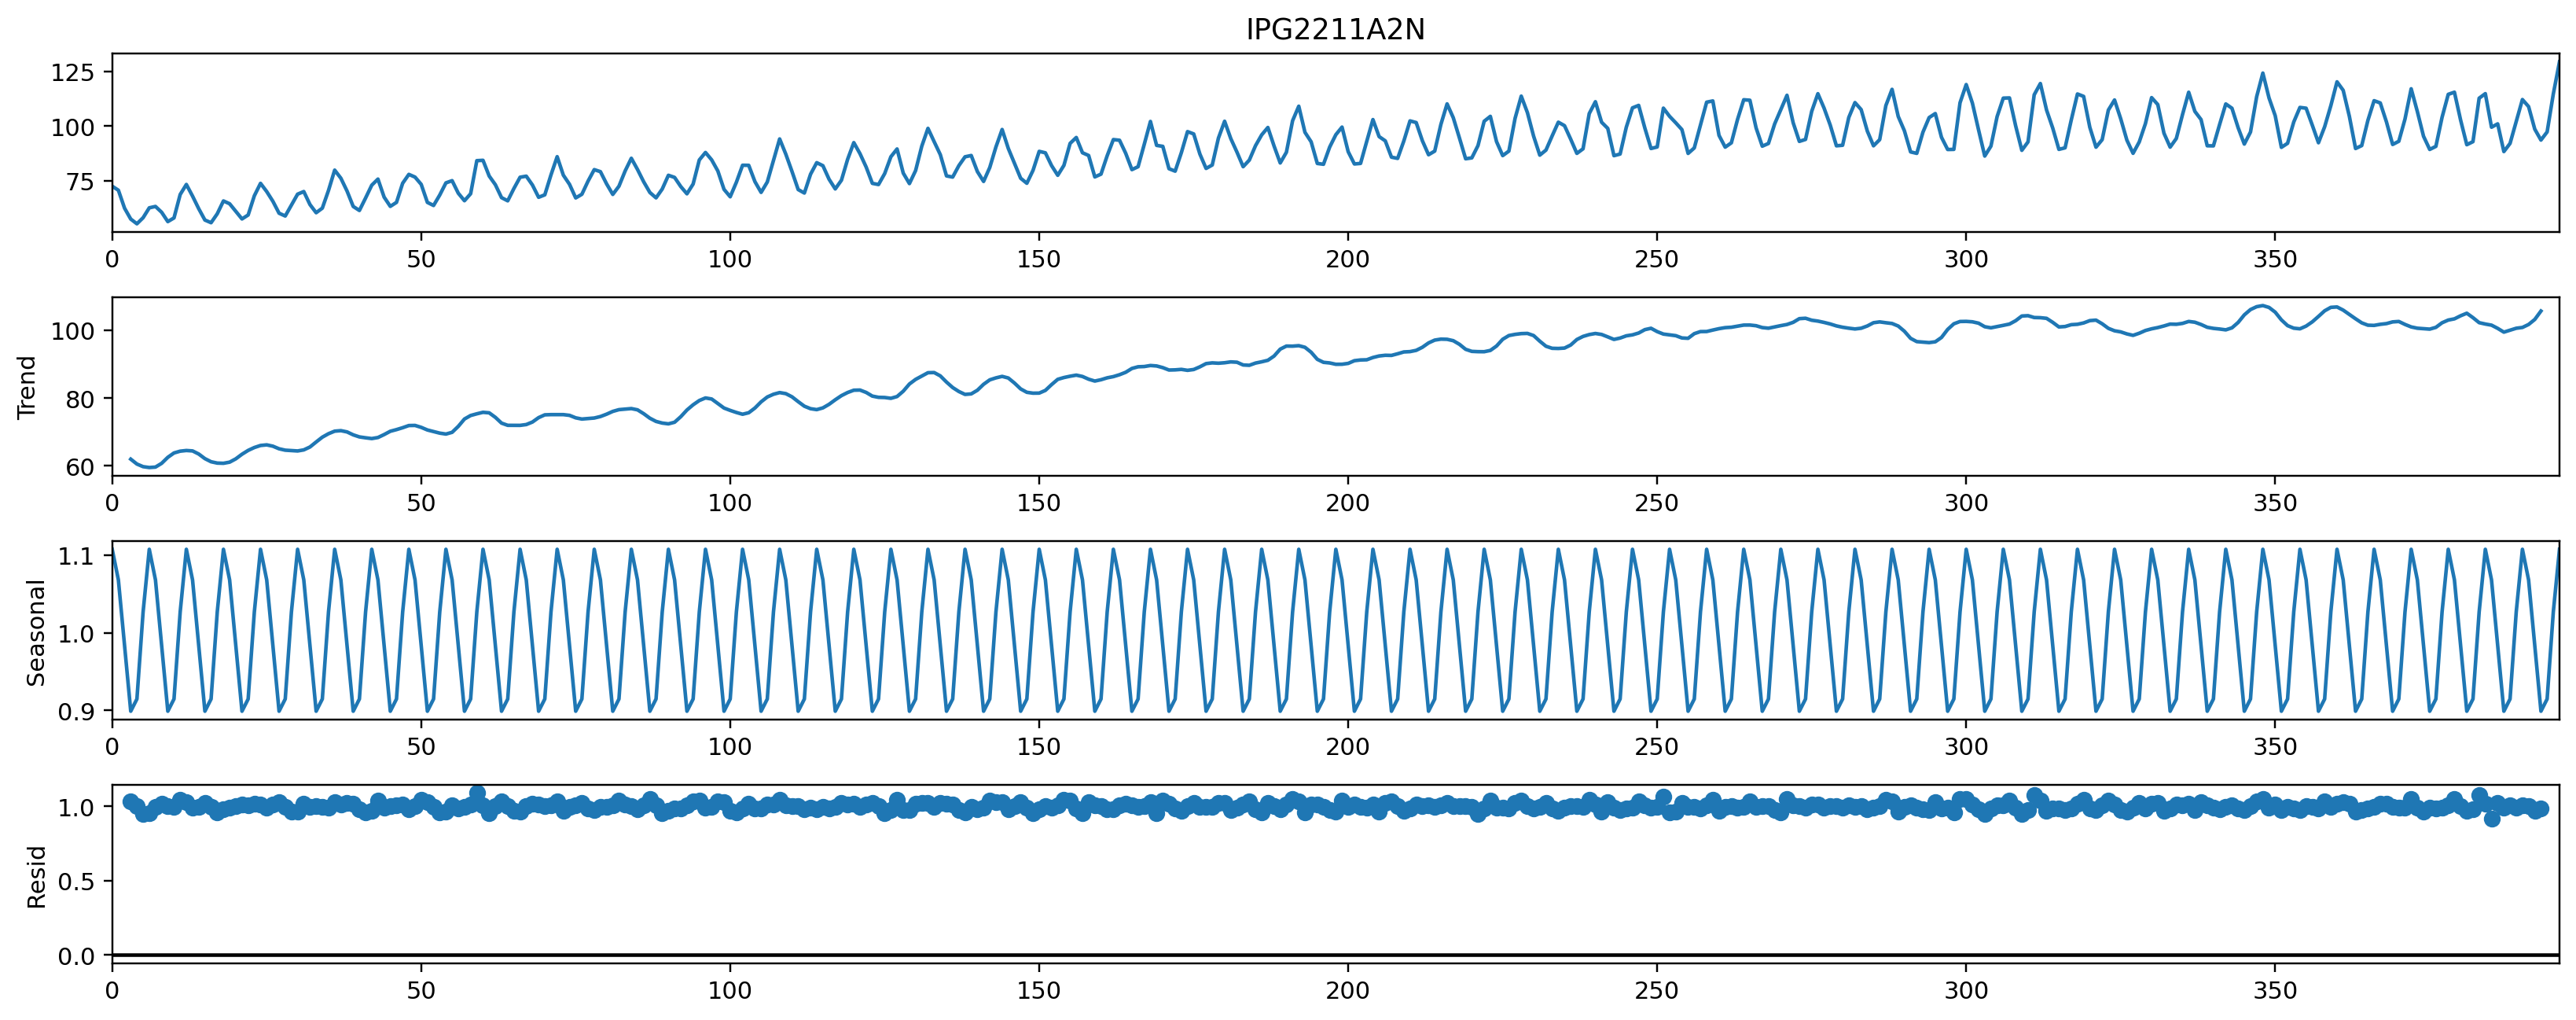

In [ ]:
result = seasonal_decompose(df['IPG2211A2N'], model='mul',freq = 6) 
result.plot();

<ipython-input-40-213adc0f9fbe>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df['IPG2211A2N'], model='add',freq = 6)


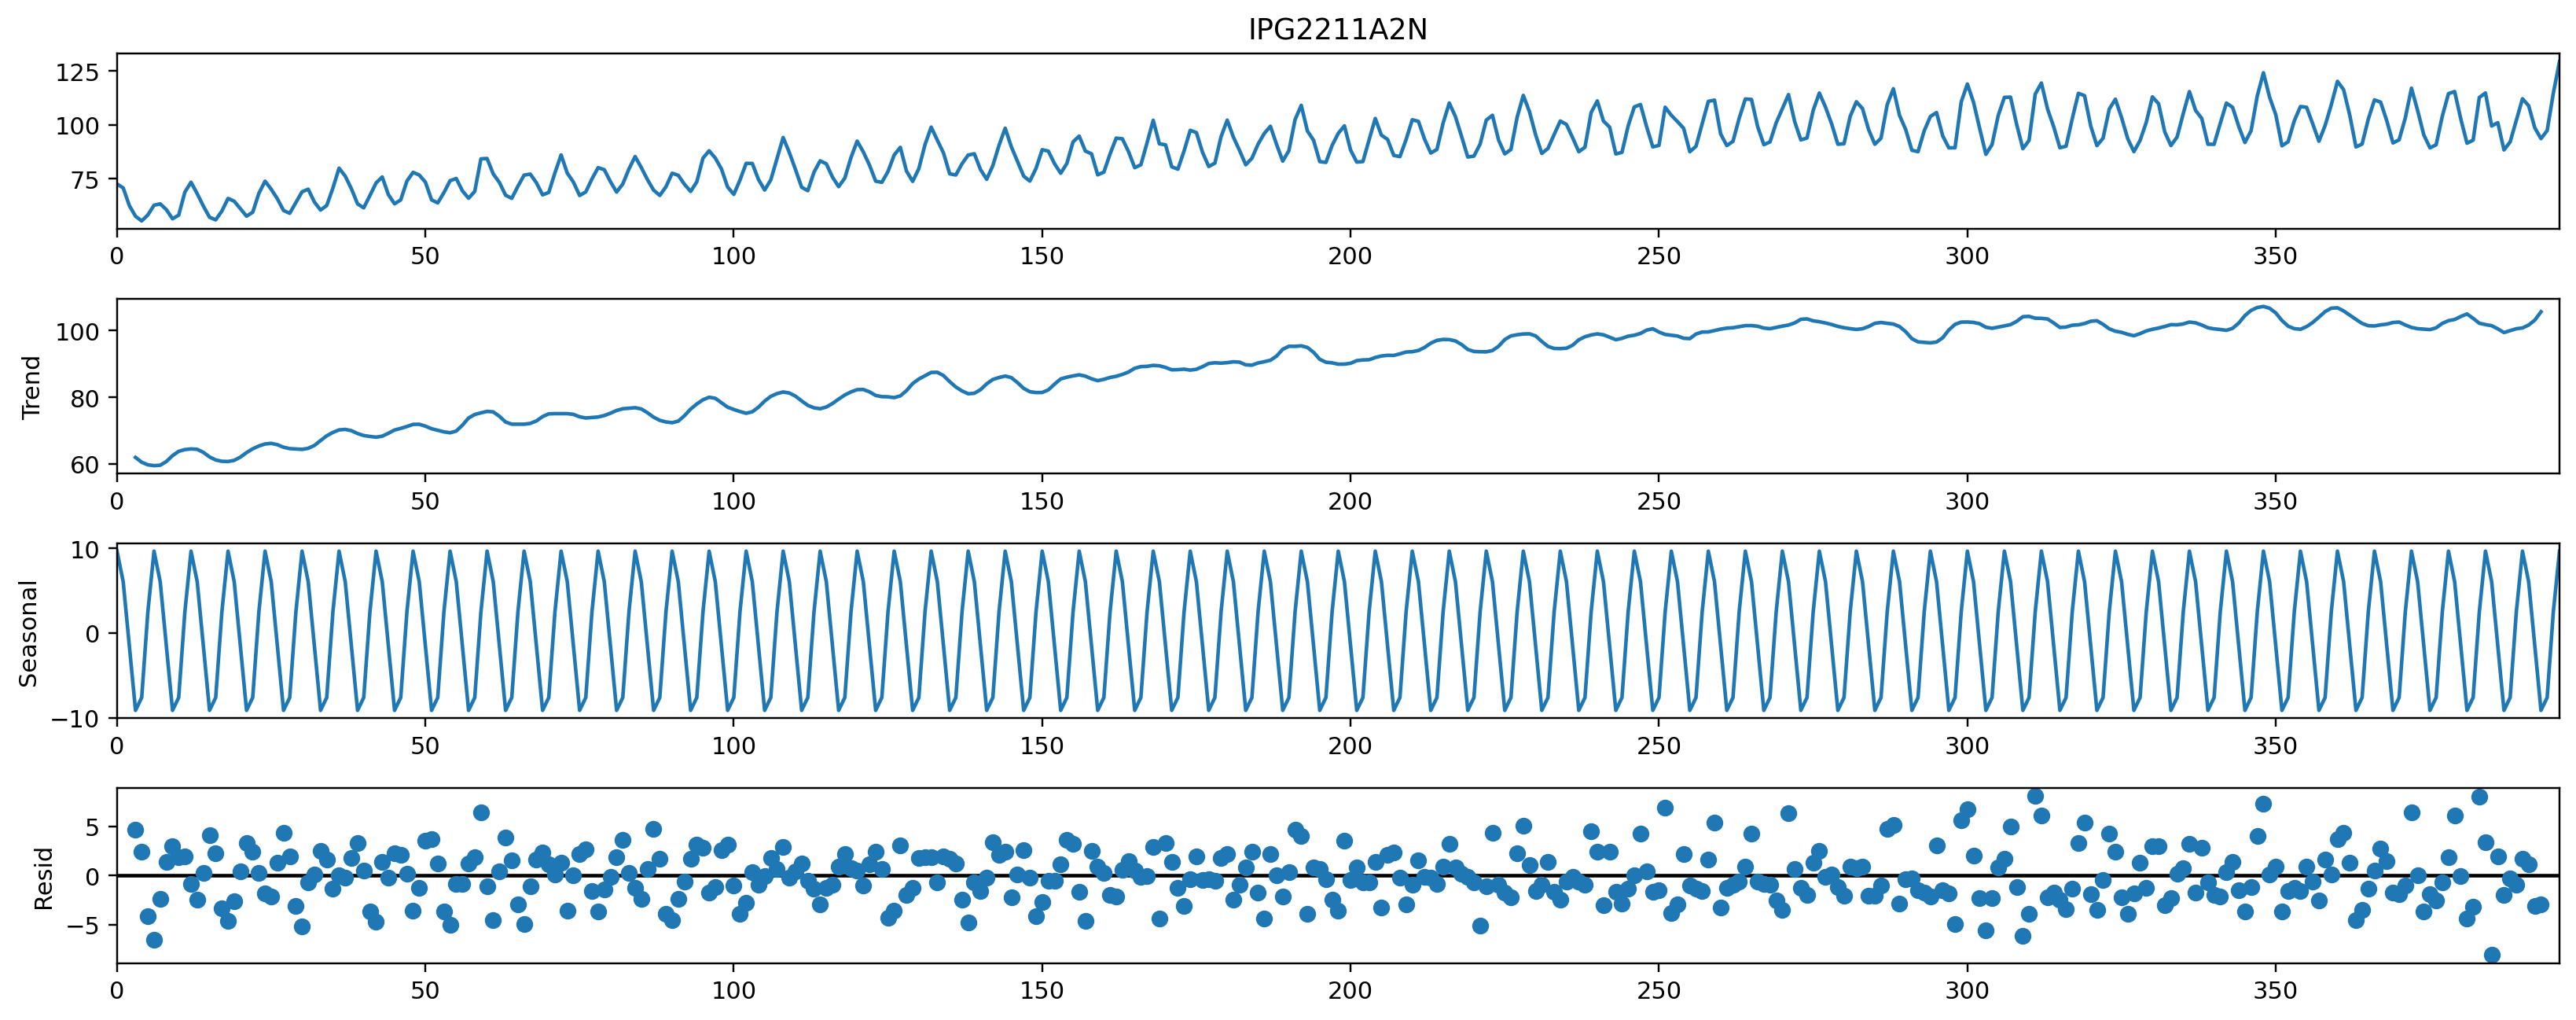

In [ ]:
result = seasonal_decompose(df['IPG2211A2N'], model='add',freq = 6) 
result.plot();